# Questions

* Is account tenure in months or in years
* 259 duplicate records, all belongs to unique account. Is it advisable to remove them?

# Assumptions

* Tenure is in months

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.set_option('display.expand_frame_repr', False)

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

# PROBLEM STATEMENT

* An E Commerce company or DTH (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the  existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. 


* In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.


* You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation. Hence be very careful while providing campaign recommendation.


# Data Dictionary

In [3]:
data_dictionary = pd.read_excel("Customer Churn Data.xlsx", index_col=1, sheet_name='Meta Data', header=1 ).drop(columns='Unnamed: 0', axis=1)
data_dictionary

Description
Variable                                                               
AccountID                                     account unique identifier
Churn                                       account churn flag (Target)
Tenure                                                Tenure of account
City_Tier                               Tier of primary customer's city
CC_Contacted_L12m     How many times all the customers of the accoun...
Payment               Preferred Payment mode of the customers in the...
Gender                    Gender of the primary customer of the account
Service_Score         Satisfaction score given by customers of the a...
Account_user_count         Number of customers tagged with this account
account_segment              Account segmentation on the basis of spend
CC_Agent_Score        Satisfaction score given by customers of the a...
Marital_Status        Marital status of the primary customer of the ...
rev_per_month         Monthly average revenue generated by account i...
Complain_l12m         Any complaints has been raised by account in l...
rev_growth_yoy        revenue growth percentage of the account (last...
coupon_used_l12m      How many times customers have used coupons to ...
Day_Since_CC_connect  Number of days since no customers in the accou...
cashback_l12m         Monthly average cashback generated by account ...
Login_device          Preferred login device of the customers in the...

# Importing data

In [4]:
# importing the dataset

df = pd.read_excel("Customer Churn Data.xlsx", sheet_name='Data for DSBA')
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  Service_Score Account_user_count account_segment  CC_Agent_Score Marital_Status rev_per_month  Complain_ly rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback Login_device
0      20000      1      4        3.0              6.0   Debit Card  Female            3.0                  3           Super             2.0         Single             9          1.0             11                       1                    5   159.93       Mobile
1      20001      1      0        1.0              8.0          UPI    Male            3.0                  4    Regular Plus             3.0         Single             7          1.0             15                       0                    0    120.9       Mobile
2      20002      1      0        1.0             30.0   Debit Card    Male            2.0                  4    Regular Plus             3.0         Single             6          1.0             14                       0                    3      NaN       Mobile
3      20003      1      0        3.0             15.0   Debit Card    Male            2.0                  4           Super             5.0         Single             8          0.0             23                       0                    3   134.07       Mobile
4      20004      1      0        1.0             12.0  Credit Card    Male            2.0                  3    Regular Plus             5.0         Single             3          0.0             11                       1                    3    129.6       Mobile

In [5]:
# renaming the columns of the dataframe

rename_columns = {
    'AccountID' : 'account_id',
    'churn' : 'churn',
    'Tenure' : 'account_tenure',
    'City_Tier' : 'city_tier',
    'CC_Contacted_LY' : 'cust_care_contacts_12m',
    'Payment' : 'payment_method',
    'Gender' : 'gender',
    'Service_Score' : 'service_score',
    'Account_user_count' : 'customers_per_account',
    'CC_Agent_Score' : 'cc_agent_score',
    'Marital_Status' : 'marital_Status',
    'rev_per_month' : 'revenue_per_month',
    'Complain_ly' : 'account_complaints_12m',
    'coupon_used_for_payment' : 'coupons_used',
    'Day_Since_CC_connect' : 'days_since_cc_contact',
    'Login_device' : 'login_device'    
}

df.rename(columns=rename_columns, inplace=True)

In [6]:
df.head()

account_id  Churn account_tenure  city_tier  cust_care_contacts_12m payment_method  gender  service_score customers_per_account account_segment  cc_agent_score marital_Status revenue_per_month  account_complaints_12m rev_growth_yoy coupons_used days_since_cc_contact cashback login_device
0       20000      1              4        3.0                     6.0     Debit Card  Female            3.0                     3           Super             2.0         Single                 9                     1.0             11            1                     5   159.93       Mobile
1       20001      1              0        1.0                     8.0            UPI    Male            3.0                     4    Regular Plus             3.0         Single                 7                     1.0             15            0                     0    120.9       Mobile
2       20002      1              0        1.0                    30.0     Debit Card    Male            2.0                     4    Regular Plus             3.0         Single                 6                     1.0             14            0                     3      NaN       Mobile
3       20003      1              0        3.0                    15.0     Debit Card    Male            2.0                     4           Super             5.0         Single                 8                     0.0             23            0                     3   134.07       Mobile
4       20004      1              0        1.0                    12.0    Credit Card    Male            2.0                     3    Regular Plus             5.0         Single                 3                     0.0             11            1                     3    129.6       Mobile

In [7]:
df.tail()

account_id  Churn account_tenure  city_tier  cust_care_contacts_12m payment_method gender  service_score customers_per_account account_segment  cc_agent_score marital_Status revenue_per_month  account_complaints_12m rev_growth_yoy coupons_used days_since_cc_contact cashback login_device
11255       31255      0             10        1.0                    34.0    Credit Card   Male            3.0                     2           Super             1.0        Married                 9                     0.0             19            1                     4   153.71     Computer
11256       31256      0             13        1.0                    19.0    Credit Card   Male            3.0                     5             HNI             5.0        Married                 7                     0.0             16            1                     8   226.91       Mobile
11257       31257      0              1        1.0                    14.0     Debit Card   Male            3.0                     2           Super             4.0        Married                 7                     1.0             22            1                     4   191.42       Mobile
11258       31258      0             23        3.0                    11.0    Credit Card   Male            4.0                     5           Super             4.0        Married                 7                     0.0             16            2                     9    179.9     Computer
11259       31259      0              8        1.0                    22.0    Credit Card   Male            3.0                     2           Super             3.0        Married                 5                     0.0             13            2                     3   175.04       Mobile

In [8]:
df.sample(10)

account_id  Churn account_tenure  city_tier  cust_care_contacts_12m payment_method  gender  service_score customers_per_account account_segment  cc_agent_score marital_Status revenue_per_month  account_complaints_12m rev_growth_yoy coupons_used days_since_cc_contact cashback login_device
6379       26379      0              3        1.0                    17.0     Debit Card    Male            2.0                     3           Super             3.0        Married                 2                     0.0             14            8                     9   136.91       Mobile
5090       25090      0             25        1.0                    13.0    Credit Card  Female            3.0                     5       Regular +             3.0         Single                 +                     NaN             15            4                     8   153.38     Computer
2218       22218      0              9        1.0                    12.0     Debit Card    Male            2.0                     5    Regular Plus             3.0        Married                 2                     0.0             14            1                     7   127.41       Mobile
6101       26101      0              8        1.0                    13.0     Debit Card       F            2.0                     1    Regular Plus             3.0         Single                 4                     0.0             13            0                     2   129.06       Mobile
4865       24865      0             13        3.0                     9.0     Debit Card    Male            3.0                     2             HNI             3.0         Single                 2                     0.0             19            1                     8    203.8       Mobile
7957       27957      0             11        1.0                    15.0     Debit Card    Male            2.0                     1    Regular Plus             3.0        Married                 2                     0.0             12            0                     3    129.1     Computer
7190       27190      0             14        3.0                    17.0     Debit Card  Female            3.0                     3             HNI             1.0         Single                 8                     1.0             20            0                     0   242.91       Mobile
5983       25983      0              0        NaN                    25.0    Credit Card       M            2.0                     3    Regular Plus             3.0       Divorced                 3                     0.0             13            1                     6   122.96       Mobile
2051       22051      1              3        3.0                    30.0     Debit Card  Female            3.0                     1      Super Plus             4.0         Single                 5                     1.0             16            1                     0   231.94     Computer
4311       24311      0              9        3.0                     7.0       E wallet    Male            4.0                     4             HNI             4.0        Married                 3                     0.0             14            1                     7   197.95       Mobile

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_id              11260 non-null  int64  
 1   Churn                   11260 non-null  int64  
 2   account_tenure          11158 non-null  object 
 3   city_tier               11148 non-null  float64
 4   cust_care_contacts_12m  11158 non-null  float64
 5   payment_method          11151 non-null  object 
 6   gender                  11152 non-null  object 
 7   service_score           11162 non-null  float64
 8   customers_per_account   11148 non-null  object 
 9   account_segment         11163 non-null  object 
 10  cc_agent_score          11144 non-null  float64
 11  marital_Status          11048 non-null  object 
 12  revenue_per_month       11158 non-null  object 
 13  account_complaints_12m  10903 non-null  float64
 14  rev_growth_yoy          11260 non-null

### Inference

* Total records: 11,260
* Total features: 19
* Float: 5
* Int: 2
* String: 12
* Missing values: Yes

### Datatype conversion check

* account_tenure, 
* customers_per_account, 
* revenue_per_month, 
* rev_growth_yoy, 
* coupons_used, 
* days_since_cc_contact, 
* cashback  is string, should be numeric


In [10]:
df.select_dtypes(include=['float64','int64']).columns

Index(['account_id', 'Churn', 'city_tier', 'cust_care_contacts_12m', 'service_score', 'cc_agent_score', 'account_complaints_12m'], dtype='object')

# Exploratory Data Analysis

In [11]:
# descriptive summary of the numeric features

df.describe().T

count          mean          std      min       25%      50%       75%      max
account_id              11260.0  25629.500000  3250.626350  20000.0  22814.75  25629.5  28444.25  31259.0
Churn                   11260.0      0.168384     0.374223      0.0      0.00      0.0      0.00      1.0
city_tier               11148.0      1.653929     0.915015      1.0      1.00      1.0      3.00      3.0
cust_care_contacts_12m  11158.0     17.867091     8.853269      4.0     11.00     16.0     23.00    132.0
service_score           11162.0      2.902526     0.725584      0.0      2.00      3.0      3.00      5.0
cc_agent_score          11144.0      3.066493     1.379772      1.0      2.00      3.0      4.00      5.0
account_complaints_12m  10903.0      0.285334     0.451594      0.0      0.00      0.0      1.00      1.0

### Inference

* About 75% of accounts are unlikely to leave (churn).
* Half of the customers come from tier 1 cities out of a total of 3 tiers.
* Most accounts (75%) have contacted customer care less than 23 times, while the average contact frequency is 18.
* The average service rating per account is 2.9, with only 25% of customers giving a score of 3 or higher (out of a scale of 0-5).
* The average customer service agent rating is 3, with only 25% of customers giving a score of 4 or above.
* The company receives very few complaints on average, with only 25% of accounts having reported atleast one complaint.

In [12]:
df.describe(include='object').T

count  unique         top  freq
account_tenure           11158      38           1  1351
payment_method           11151       5  Debit Card  4587
gender                   11152       4        Male  6328
customers_per_account    11148       7           4  4569
account_segment          11163       7       Super  4062
marital_Status           11048       3     Married  5860
revenue_per_month        11158      59           3  1746
rev_growth_yoy           11260      20          14  1524
coupons_used             11260      20           1  4373
days_since_cc_contact    10903      24           3  1816
cashback               10789.0  5693.0      155.62  10.0
login_device             11039       3      Mobile  7482

### Inference

* Most accounts (majority) use Debit card as payment method out of 5 options.
* Most customers are male, with 4 gender categories to check.
* Most accounts have 4 customers per account.
* Most accounts belong to the Super category out of 7 segments.
* Most customers are Married, with 3 marital status categories.
* Most customers access the website via Mobile.

In [13]:
print("Unqiue values per column:")
df.nunique()

Unqiue values per column:


account_id                11260
Churn                         2
account_tenure               38
city_tier                     3
cust_care_contacts_12m       44
payment_method                5
gender                        4
service_score                 6
customers_per_account         7
account_segment               7
cc_agent_score                5
marital_Status                3
revenue_per_month            59
account_complaints_12m        2
rev_growth_yoy               20
coupons_used                 20
days_since_cc_contact        24
cashback                   5693
login_device                  3
dtype: int64

### Inference

* account_id variable is not needed for modelling purpose and hence can be dropped

In [14]:
# dropping account_id column

df.drop('account_id', axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn                   11260 non-null  int64  
 1   account_tenure          11158 non-null  object 
 2   city_tier               11148 non-null  float64
 3   cust_care_contacts_12m  11158 non-null  float64
 4   payment_method          11151 non-null  object 
 5   gender                  11152 non-null  object 
 6   service_score           11162 non-null  float64
 7   customers_per_account   11148 non-null  object 
 8   account_segment         11163 non-null  object 
 9   cc_agent_score          11144 non-null  float64
 10  marital_Status          11048 non-null  object 
 11  revenue_per_month       11158 non-null  object 
 12  account_complaints_12m  10903 non-null  float64
 13  rev_growth_yoy          11260 non-null  object 
 14  coupons_used            11260 non-null

In [16]:
df.Churn.value_counts(normalize=True)*100

0    83.161634
1    16.838366
Name: Churn, dtype: float64

In [17]:
# check for duplicate columns

print("Number of duplicate rows:", df.duplicated().sum())
df[df.duplicated()]

Number of duplicate rows: 259


Churn account_tenure  city_tier  cust_care_contacts_12m    payment_method  gender  service_score customers_per_account account_segment  cc_agent_score marital_Status revenue_per_month  account_complaints_12m rev_growth_yoy coupons_used days_since_cc_contact cashback login_device
1347      1              0        1.0                     8.0               UPI    Male            3.0                     4    Regular Plus             3.0         Single                 7                     1.0             15            0                     0    120.9       Mobile
1395      1             11        1.0                     6.0        Debit Card    Male            3.0                     4             HNI             3.0         Single                10                     1.0             13            0                     0   153.81       Mobile
1456      1              0        1.0                    13.0        Debit Card    Male            3.0                     5           Super             3.0         Single                 2                     1.0             24            1                     6   160.74     Computer
1485      1              0        1.0                    15.0       Credit Card  Female            2.0                     3    Regular Plus             5.0         Single                 8                     0.0             22            1                     4      142       Mobile
1498      0             18        1.0                    15.0        Debit Card    Male            2.0                     3           Super             4.0        Married                 9                     0.0             18            1                    15   123.48       Mobile
1514      0              5        1.0                    12.0        Debit Card    Male            2.0                     3    Regular Plus             3.0         Single                 4                     0.0             20            0                     4   130.38       Mobile
1516      1              0        3.0                     6.0  Cash on Delivery  Female            3.0                     5    Regular Plus             5.0         Single                 1                     0.0             21            1                     0   123.25     Computer
1542      0             15        1.0                    27.0       Credit Card  Female            2.0                     3           Super             3.0        Married                 3                     0.0             16            0                     2   152.65     Computer
1547      0              7        1.0                    16.0       Credit Card    Male            2.0                     3    Regular Plus             3.0        Married                 2                     1.0             17            2                     0   138.15     Computer
1568      0             11        3.0                     9.0        Debit Card    Male            3.0                     3             HNI             3.0        Married                 1                     0.0             12            1                    13   206.09       Mobile
1607      0              5        1.0                     8.0  Cash on Delivery    Male            2.0                     4           Super             5.0         Single                 5                     0.0             13            0                     4   121.76       Mobile
1619      0              0        1.0                     9.0       Credit Card    Male            3.0                     4    Regular Plus             3.0         Single                 2                     0.0             17            1                     0    132.3       Mobile
1635      0             22        1.0                    16.0        Debit Card  Female            2.0                     3         Regular             5.0         Single                10                     1.0             11            0                     2   286.65     Computer
17

In [18]:
# Checking the distribution of the target value among the duplicate rows
print('Percentage % Distribution of target variable among the duplicated records')
df[df.duplicated()]['Churn'].value_counts(normalize=True)*100

Percentage % Distribution of target variable among the duplicated records


0    83.011583
1    16.988417
Name: Churn, dtype: float64

### Inference

* There are 259 duplicate records found, since the distribution of the target variable is nearly same in duplicate records and that of original, removing the duplicates will not result in change of distribution

In [19]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [20]:
# checking null values

df.isnull().sum()

Churn                       0
account_tenure            102
city_tier                 112
cust_care_contacts_12m    102
payment_method            109
gender                    108
service_score              98
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            212
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

#### Inference

* Except columns rev_growth_you and coupons_used, remaining columns must be imputed for missing values

# Univariate Analysis

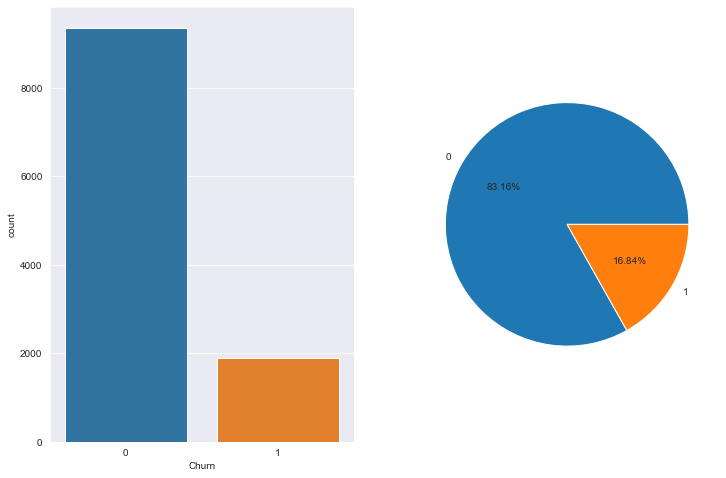

In [21]:
# checking the target variable - churn column for imbalance

plt.figure(figsize=(12,8))

# bar plot

ax1 = plt.subplot(1,2,1)
countplot = sns.countplot(x=df['Churn'])

ax2 = plt.subplot(1,2,2)
plt.pie(x=df['Churn'].value_counts(), labels= list(df['Churn'].value_counts().index), autopct='%1.2f%%')

plt.show()

### Inference

* The distribution of duplicate rows is same as the entire distribution of the target variable. Hence removing the duplicates will not affect the entire distribution

In [22]:
# Univariate analysis on numeric columns

def univariate_analysis(column,nbins):
    print('\033[1m'+ "Description of " + column + '\033[0m' + '\n' )
    print(df[column].describe())
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "Distribution of " + column + '\033[0m' + '\n')
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "BoxPlot of " + column + '\033[0m' + '\n')
    ax = sns.boxplot(x=df[column])
    plt.show()
    print("----------------------------------------------------------------------------")
    

Description of Churn

count    11260.000000
mean         0.168384
std          0.374223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64
----------------------------------------------------------------------------
Distribution of Churn



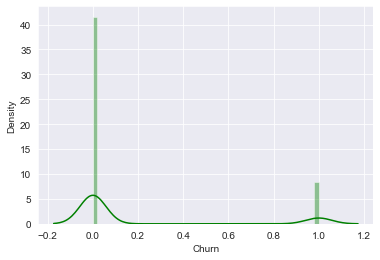

----------------------------------------------------------------------------
BoxPlot of Churn



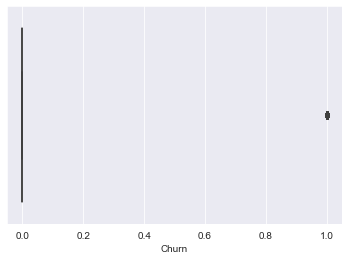

----------------------------------------------------------------------------
Description of city_tier

count    11148.000000
mean         1.653929
std          0.915015
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: city_tier, dtype: float64
----------------------------------------------------------------------------
Distribution of city_tier



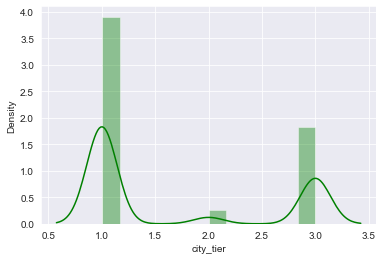

----------------------------------------------------------------------------
BoxPlot of city_tier



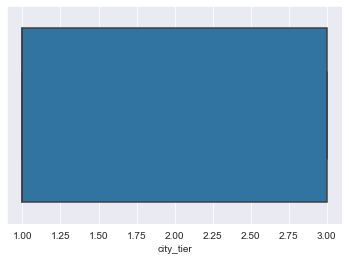

----------------------------------------------------------------------------
Description of cust_care_contacts_12m

count    11158.000000
mean        17.867091
std          8.853269
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: cust_care_contacts_12m, dtype: float64
----------------------------------------------------------------------------
Distribution of cust_care_contacts_12m



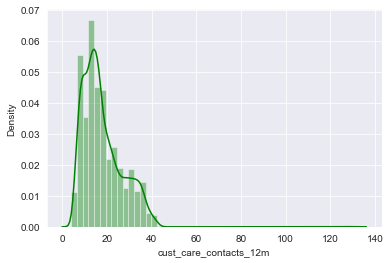

----------------------------------------------------------------------------
BoxPlot of cust_care_contacts_12m



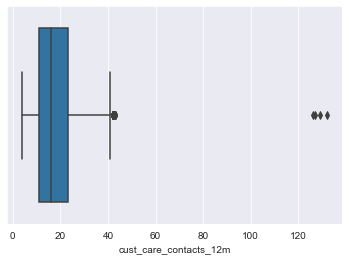

----------------------------------------------------------------------------
Description of service_score

count    11162.000000
mean         2.902526
std          0.725584
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: service_score, dtype: float64
----------------------------------------------------------------------------
Distribution of service_score



----------------------------------------------------------------------------
BoxPlot of service_score



----------------------------------------------------------------------------
Description of cc_agent_score

count    11144.000000
mean         3.066493
std          1.379772
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: cc_agent_score, dtype: float64
----------------------------------------------------------------------------
Distribution of cc_agent_score



----------------------------------------------------------------------------
BoxPlot of cc_agent_score



----------------------------------------------------------------------------
Description of account_complaints_12m

count    10903.000000
mean         0.285334
std          0.451594
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: account_complaints_12m, dtype: float64
----------------------------------------------------------------------------
Distribution of account_complaints_12m



----------------------------------------------------------------------------
BoxPlot of account_complaints_12m



----------------------------------------------------------------------------


In [23]:
for column in list(df.select_dtypes(exclude='object').columns):
    univariate_analysis(column,20)

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'Churn'),
  Text(2, 0, 'city_tier'),
  Text(3, 0, 'cust_care_contacts_12m'),
  Text(4, 0, 'service_score'),
  Text(5, 0, 'cc_agent_score'),
  Text(6, 0, 'account_complaints_12m')])

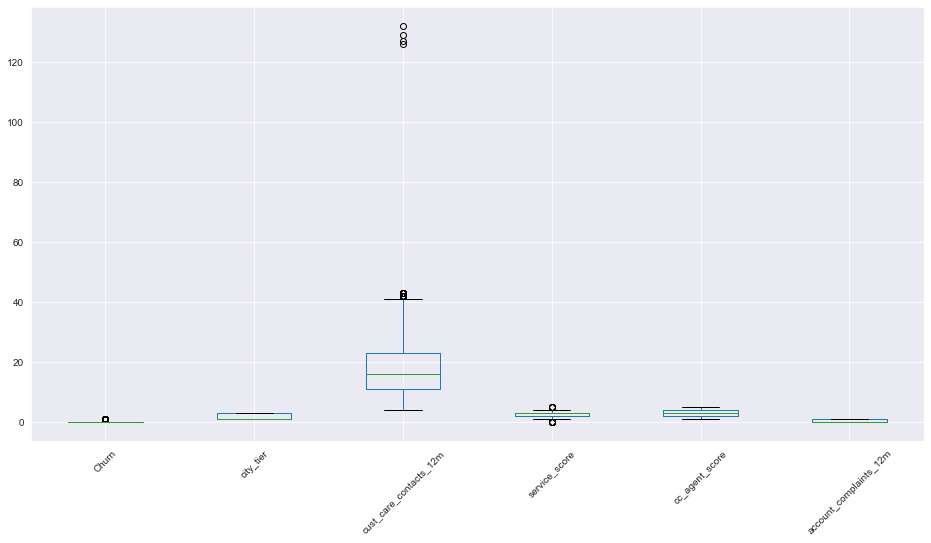

In [24]:
# Checking the presence of outliers in the dataset all columns at once

plt.figure(figsize=(16,8))
df.boxplot()
plt.xticks(rotation=45)

### Inference

* cust_care_contacts_12m needs to be treated for outliers

In [25]:
# Count plot of all object columns

plt.figure(figsize=(16,70))
plotnumber = 1

for column in df.drop('Churn', axis=1):
    if plotnumber <=df.shape[1]:
        ax1 = plt.subplot(18,1,plotnumber)
        sns.countplot(data=df, x=column)
        ax1.set_title('Count Plot of '+column, fontsize=14)
    plotnumber +=1
plt.tight_layout()
        


### Inference

#### account_tenure
* account_tenure has record for 0. Does it correspond to freshly opened accounts?
* Contains # as a class, need to be processed
* Majority of the accounts are 1 month old
* Currently string, must convert to integer

#### city_tier
* Majority from tier 1 followed by tier 3

#### cust_care_contacts_12m, account_complaints_12m
* All good

#### payment_method
* Most of the accounts pay by Debit card or Credit Card
* Must be encoded nominally

#### gender
* Primarily contains 2 categories with majority being Male
* F and M must be converted
* Should be encoded

#### service_score
* Majority of the accounts have given a score of 3 followed by 2 and 4 resp

#### customers_per_account
* Contains misc characters such as @, should be replaced accordingly
* Can either replace with median or 2 by mistake they could have entered @
* must be converted to integer after replacement

#### account_segment
* Contains primarily Regular, Regular Plus, Super, Super Plus, HNI. All other categories must be replaced accordingly
* Must be encoded ordinally

#### cc_agent_score
* All good

#### marital_status
* Majority of the customers are married, followed by single and divorced

#### revenue_per_month
* contains character +, must be replaced
* must be converted to integer

#### rev_growth_yoy
* contains character dollar, must be replaced with mean or median or 4
* must be converted to integer

#### coupons_used
* contains many special characters, need to be processed with their corresponding numbers
* must be converter to integer

#### days_since_cc_contact
* contains character dollar, must be replaced with mean or median or 4
* must be converted to integer

#### cashback
* Contains non numeric characters, must be replaced with median amount

#### login_device
* Contains unknown category, must be replaced

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn                   11260 non-null  int64  
 1   account_tenure          11158 non-null  object 
 2   city_tier               11148 non-null  float64
 3   cust_care_contacts_12m  11158 non-null  float64
 4   payment_method          11151 non-null  object 
 5   gender                  11152 non-null  object 
 6   service_score           11162 non-null  float64
 7   customers_per_account   11148 non-null  object 
 8   account_segment         11163 non-null  object 
 9   cc_agent_score          11144 non-null  float64
 10  marital_Status          11048 non-null  object 
 11  revenue_per_month       11158 non-null  object 
 12  account_complaints_12m  10903 non-null  float64
 13  rev_growth_yoy          11260 non-null  object 
 14  coupons_used            11260 non-null

In [27]:
df[df['account_tenure']==0]

Churn account_tenure  city_tier  cust_care_contacts_12m payment_method  gender  service_score customers_per_account account_segment  cc_agent_score marital_Status revenue_per_month  account_complaints_12m rev_growth_yoy coupons_used days_since_cc_contact cashback login_device
1         1              0        1.0                     8.0            UPI    Male            3.0                     4    Regular Plus             3.0         Single                 7                     1.0             15            0                     0    120.9       Mobile
2         1              0        1.0                    30.0     Debit Card    Male            2.0                     4    Regular Plus             3.0         Single                 6                     1.0             14            0                     3      NaN       Mobile
3         1              0        3.0                    15.0     Debit Card    Male            2.0                     4           Super             5.0         Single                 8                     0.0             23            0                     3   134.07       Mobile
4         1              0        1.0                    12.0    Credit Card    Male            2.0                     3    Regular Plus             5.0         Single                 3                     0.0             11            1                     3    129.6       Mobile
5         1              0        1.0                    22.0     Debit Card  Female            3.0                   NaN    Regular Plus             5.0         Single                 2                     1.0             22            4                     7   139.19     Computer
...     ...            ...        ...                     ...            ...     ...            ...                   ...             ...             ...            ...               ...                     ...            ...          ...                   ...      ...          ...
8408      0              0        3.0                    17.0            UPI  Female            2.0                     3           Super             3.0        Married                 3                     1.0             24            0                     4   149.07       Mobile
8413      1              0        3.0                    17.0       E wallet    Male            2.0                     3    Regular Plus             5.0        Married                 5                     0.0             21            1                     0    124.9     Computer
8417      1              0        1.0                    13.0    Credit Card    Male            2.0                     3    Regular Plus             1.0        Married                12                     1.0             16            2                     2   147.87       Mobile
8439      0              0        3.0                    17.0            UPI  Female            1.0                     4    Regular Plus             3.0            NaN                 2                     0.0             19            1                     0   132.66       Mobile
8442      0              0        NaN                    16.0     Debit Card       M            2.0                     1           Super             4.0        Married                 2                     1.0             22            0                     3   168.42       Mobile

[1231 rows x 18 columns]

In [28]:
df[df['customers_per_account']=='@'].describe(include='object').T

count unique         top freq
account_tenure           332     32           1   39
payment_method           332      5  Debit Card  126
gender                   332      2        Male  207
customers_per_account    332      1           @  332
account_segment          332      5   Regular +  127
marital_Status           332      3     Married  177
revenue_per_month        332      1           +  332
rev_growth_yoy           332     18          14   50
coupons_used             332     11           1  131
days_since_cc_contact    332     17           3   56
cashback               332.0  326.0      151.79  3.0
login_device             332      1        &&&&  332

In [29]:
df[df['customers_per_account']==6].describe(include='object').T

count unique         top freq
account_tenure           313     27           1  103
payment_method           311      5  Debit Card  143
gender                   310      4        Male  180
customers_per_account    315      1           6  315
account_segment          312      6       Super  131
marital_Status           310      3     Married  170
revenue_per_month        313     16           3   64
rev_growth_yoy           315     17          14   45
coupons_used             315     10           2  133
days_since_cc_contact    306     13           1   70
cashback               308.0  218.0      172.59  3.0
login_device             308      3      Mobile  196

In [30]:
df[df['rev_growth_yoy']=='$']

Churn account_tenure  city_tier  cust_care_contacts_12m payment_method  gender  service_score customers_per_account account_segment  cc_agent_score marital_Status revenue_per_month  account_complaints_12m rev_growth_yoy coupons_used days_since_cc_contact cashback login_device
3127      0              4        3.0                    14.0       E wallet    Male            3.0                     4    Regular Plus             4.0         Single                 2                     0.0              $            2                     3   154.83       Mobile
5837      0             27        1.0                    29.0     Debit Card  Female            2.0                     3           Super             3.0         Single                 7                     0.0              $            1                     3   151.69     Computer
6329      0             15        1.0                    41.0    Credit Card    Male            2.0                     5           Super             2.0         Single                 5                     0.0              $            1                     0   145.72       Mobile

In [31]:
df[df['coupons_used'].isin(['$','*','#'])]

Churn account_tenure  city_tier  cust_care_contacts_12m payment_method gender  service_score customers_per_account account_segment  cc_agent_score marital_Status revenue_per_month  account_complaints_12m rev_growth_yoy coupons_used days_since_cc_contact cashback login_device
1910      0              0        1.0                    16.0    Credit Card   Male            3.0                     1    Regular Plus             3.0         Single                 2                     0.0             18            #                     2   135.05       Mobile
2511      0             21        1.0                    10.0    Credit Card   Male            2.0                     4      Super Plus             1.0        Married                 3                     0.0             25            $                     2   252.02     Computer
3136      0             15        3.0                    17.0     Debit Card   Male            3.0                     4           Super             2.0         Single                 9                     0.0             15            *                    11    187.3     Computer

In [32]:
df.cashback.value_counts()


155.62    10
149.36     9
154.73     9
145.08     9
149.68     9
          ..
131.55     1
245.64     1
130.78     1
299.72     1
191.42     1
Name: cashback, Length: 5693, dtype: int64

In [33]:
# Cashback column must be ideally numric but its object. Checking for the presence of non-numeric elements in the column

array = df['cashback'].unique()

def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False


non_numeric_elements = list(filter(lambda x: not is_numeric(x), array))

print(non_numeric_elements)


['$']


In [34]:
# These entries must be replaced with median

df[df['cashback']=='$']

Churn account_tenure  city_tier  cust_care_contacts_12m payment_method gender  service_score customers_per_account account_segment  cc_agent_score marital_Status revenue_per_month  account_complaints_12m rev_growth_yoy coupons_used days_since_cc_contact cashback login_device
440       0              0        1.0                    16.0    Credit Card   Male            3.0                     2    Regular Plus             3.0         Single                 2                     0.0             18            1                     2        $       Mobile
1257      0              4        1.0                     9.0    Credit Card   Male            2.0                     3       Regular +             5.0        Married                 +                     NaN             13            0                     3        $     Computer

# Multivariate Analysis

<Figure size 1440x5040 with 0 Axes>

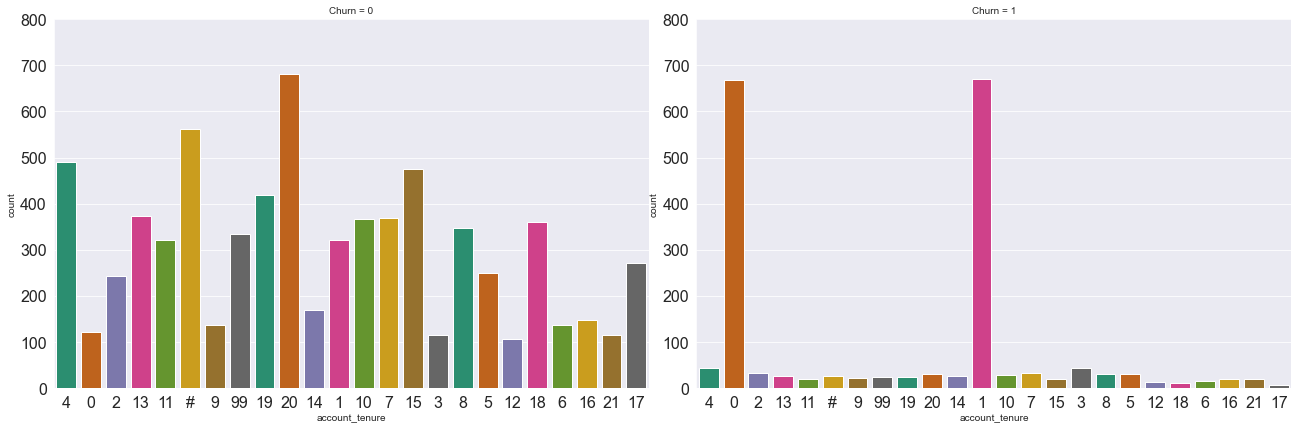

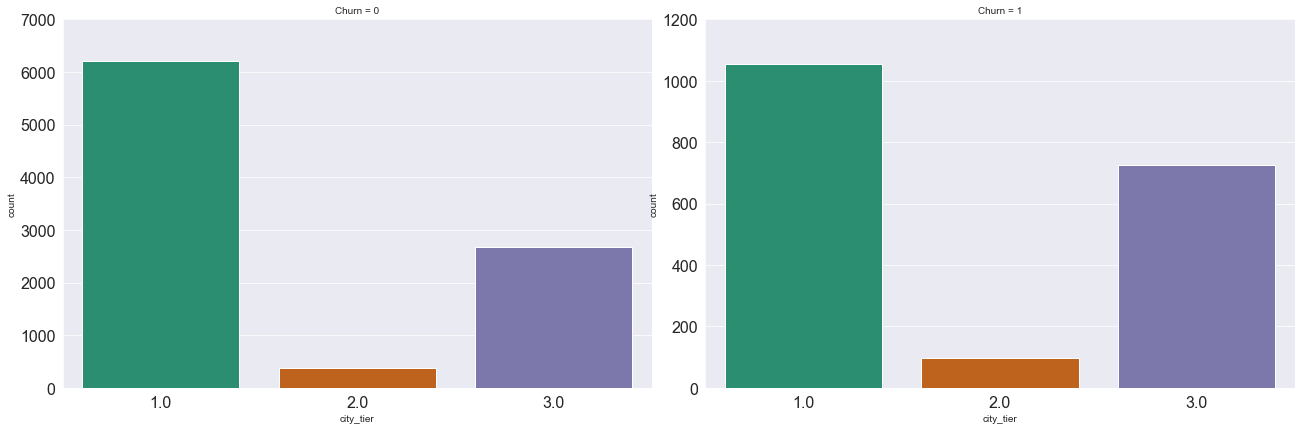

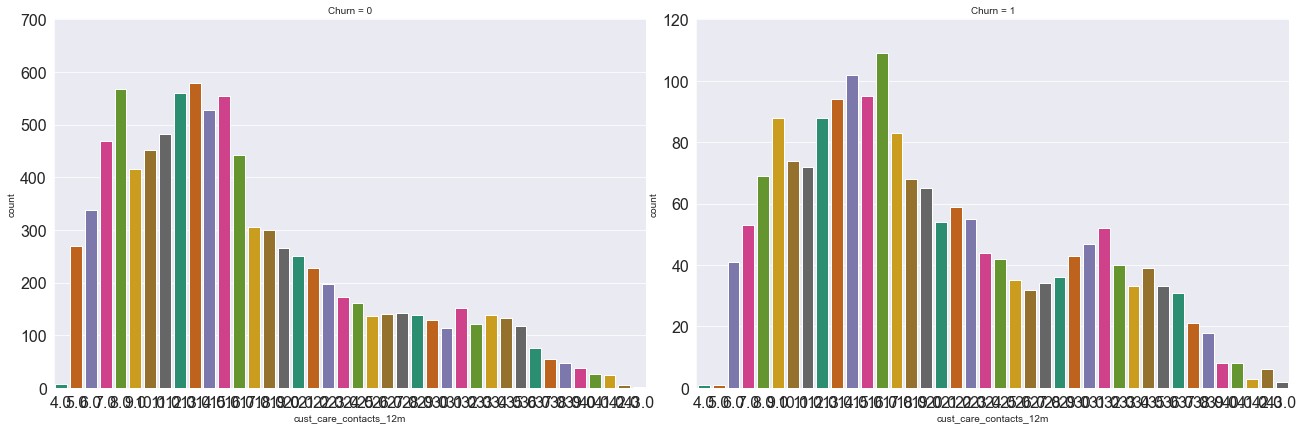

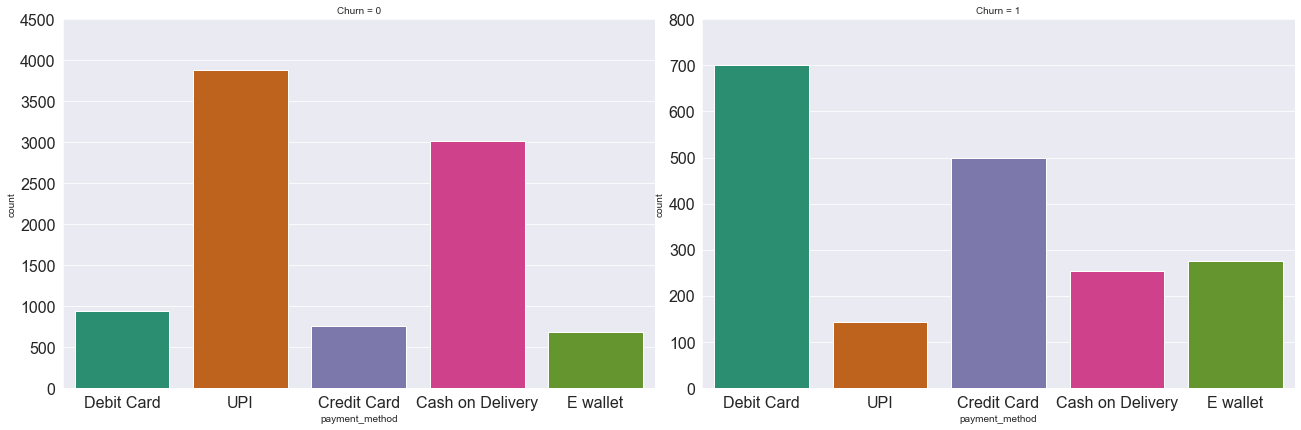

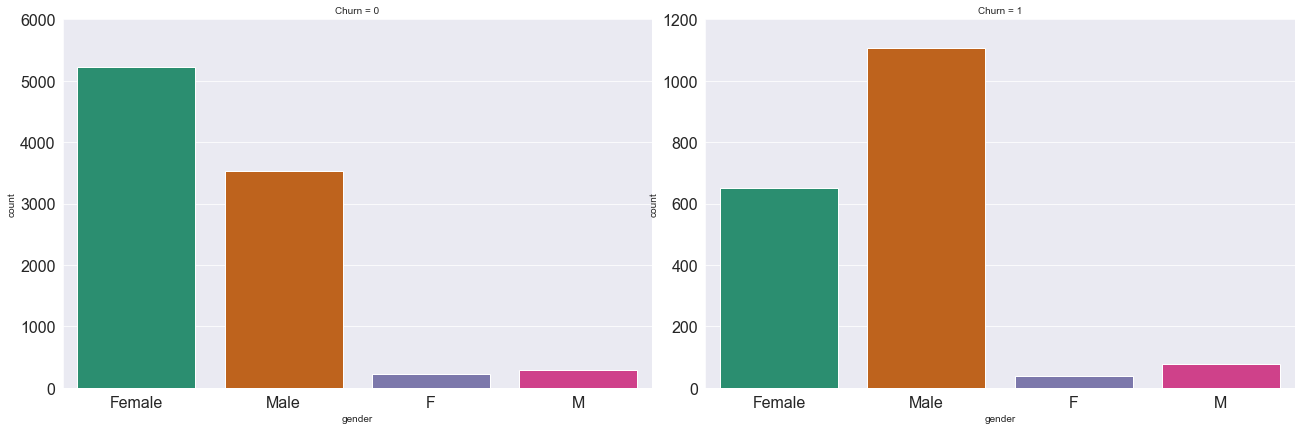

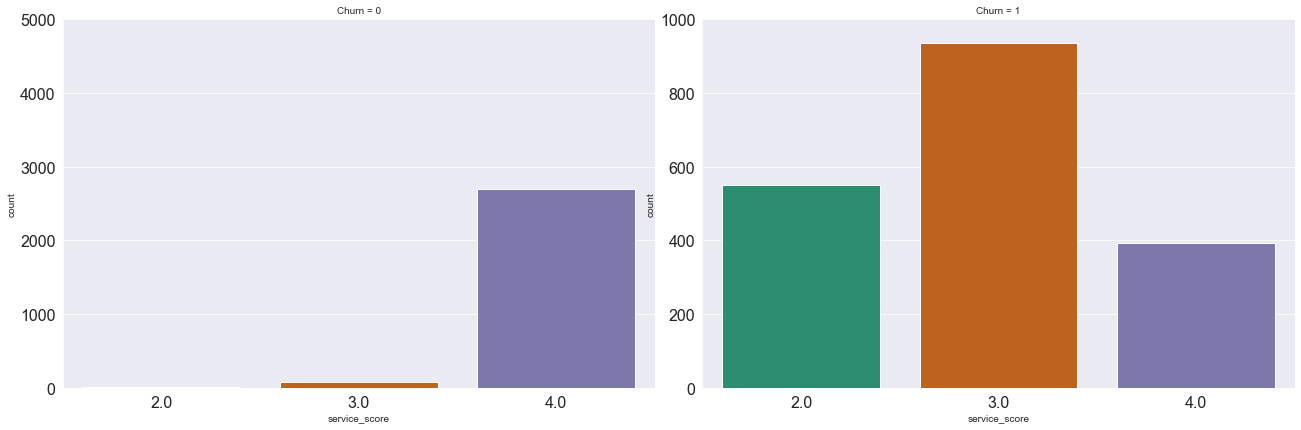

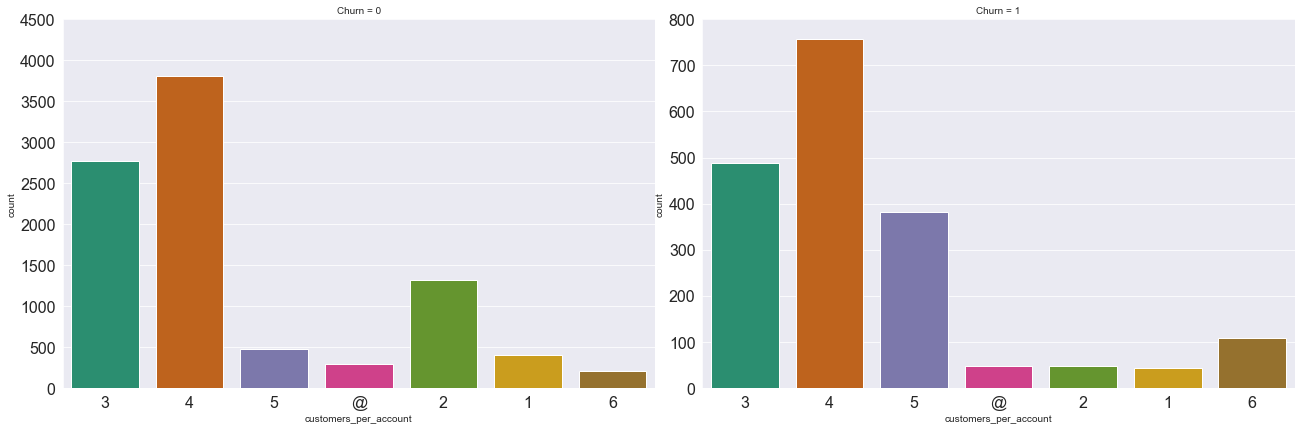

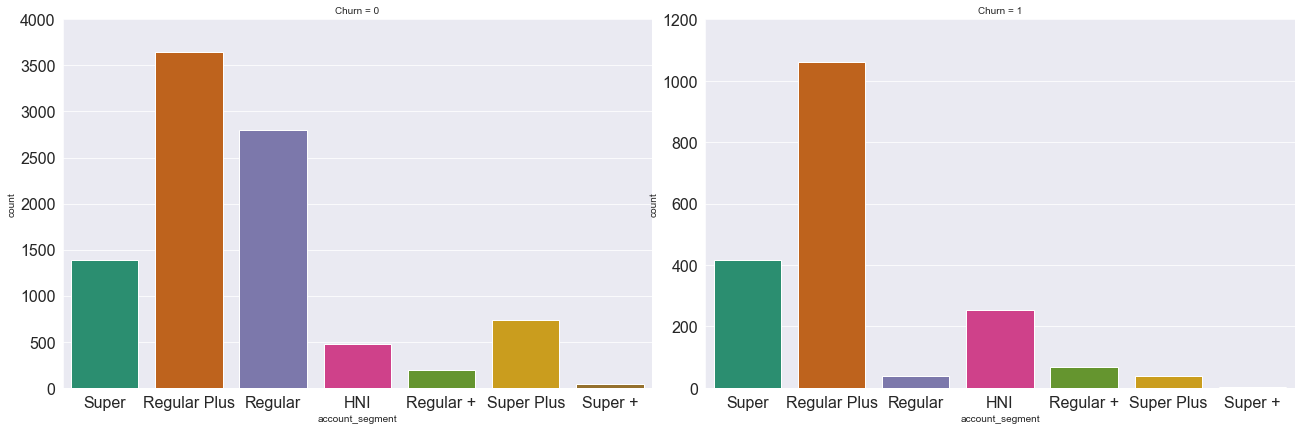

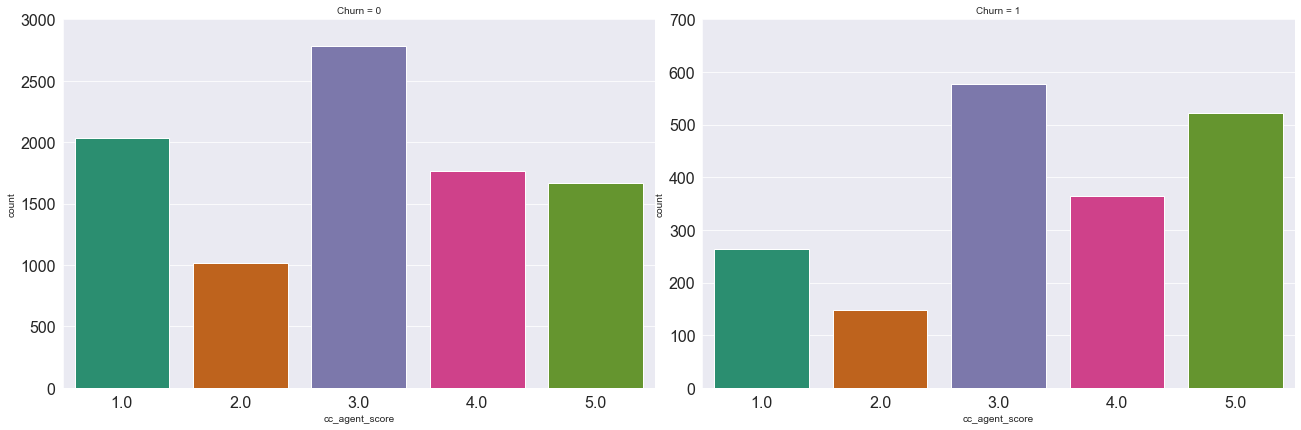

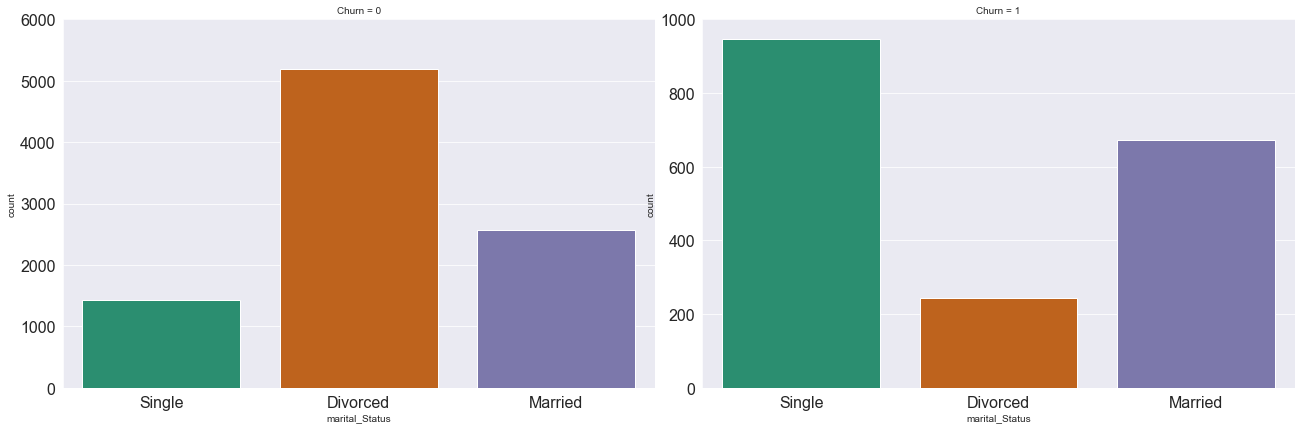

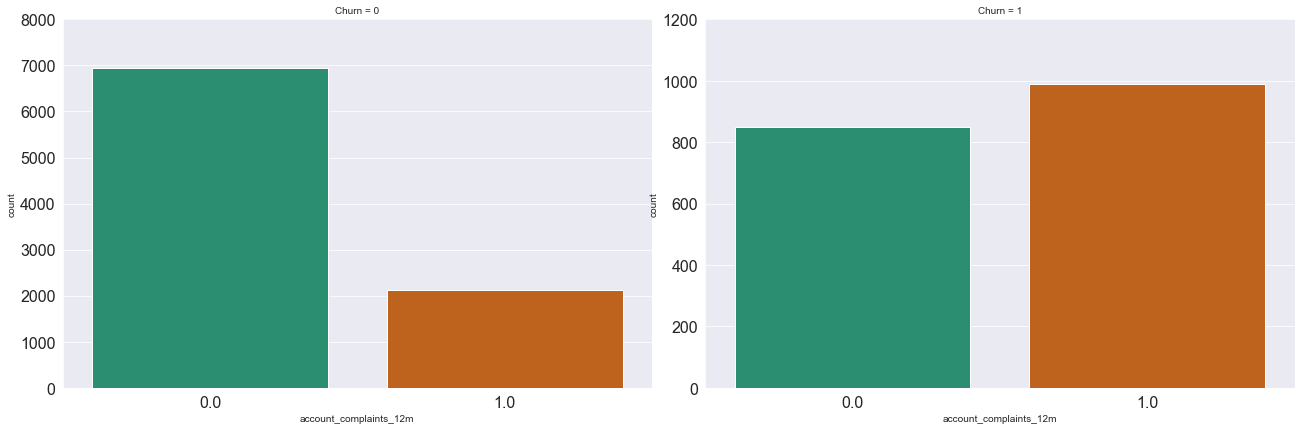

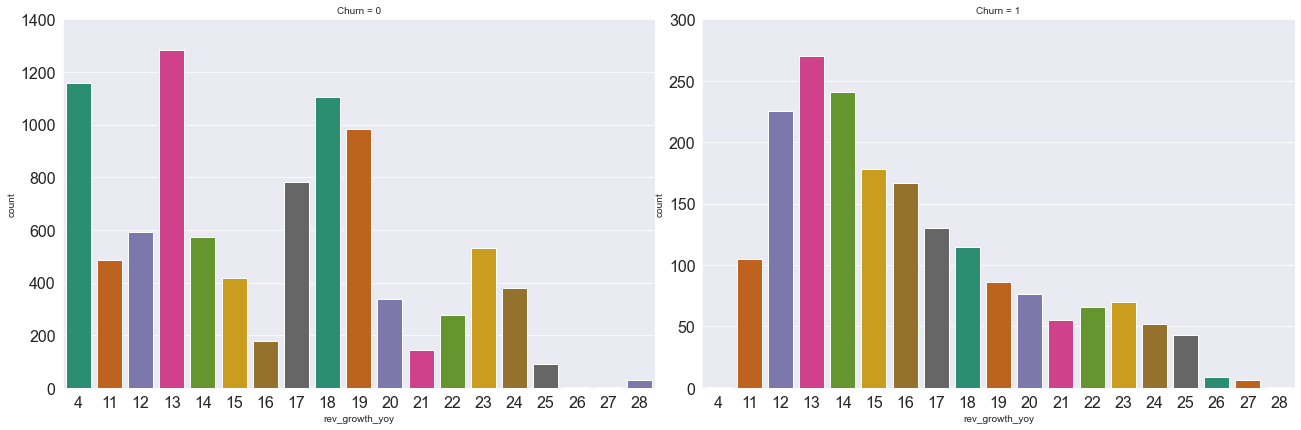

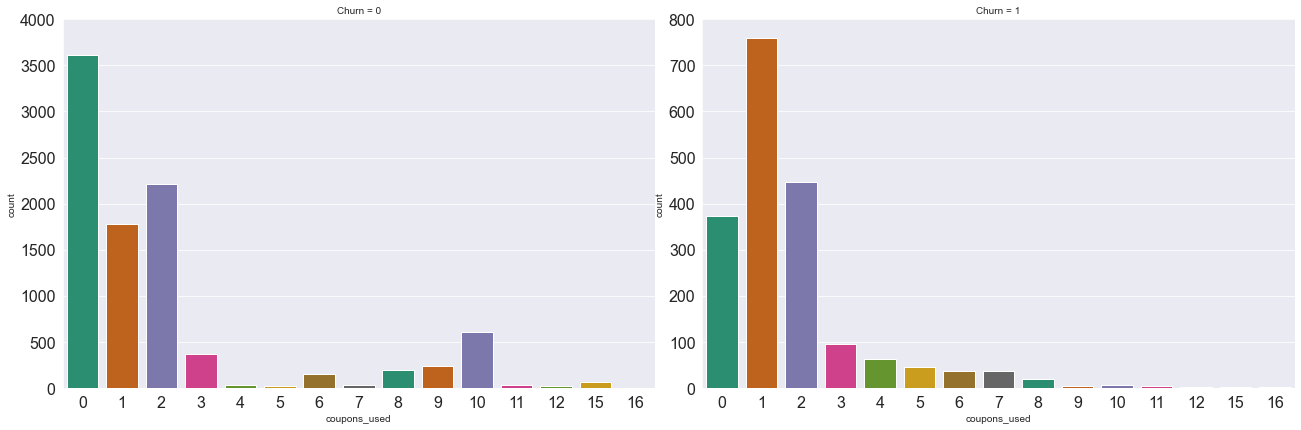

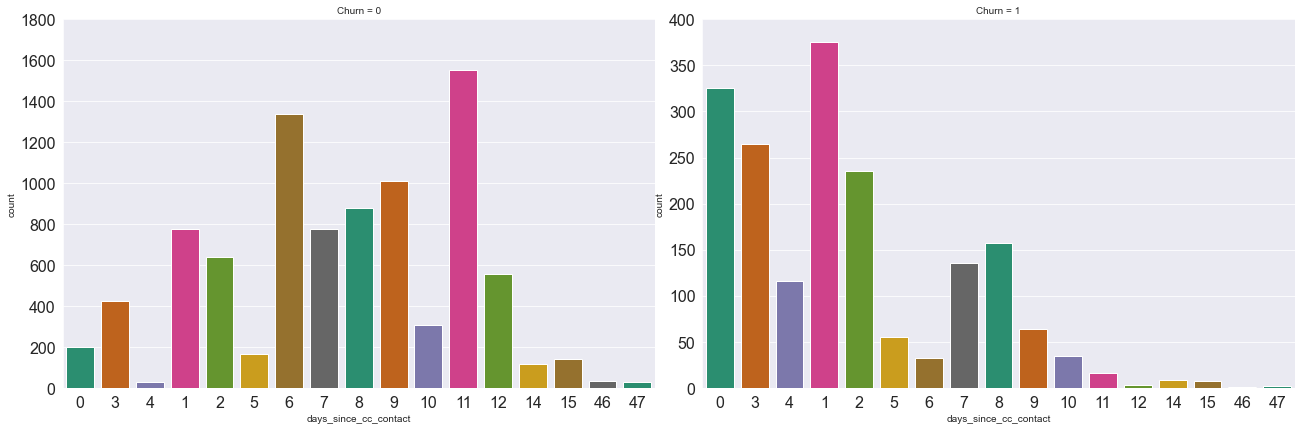

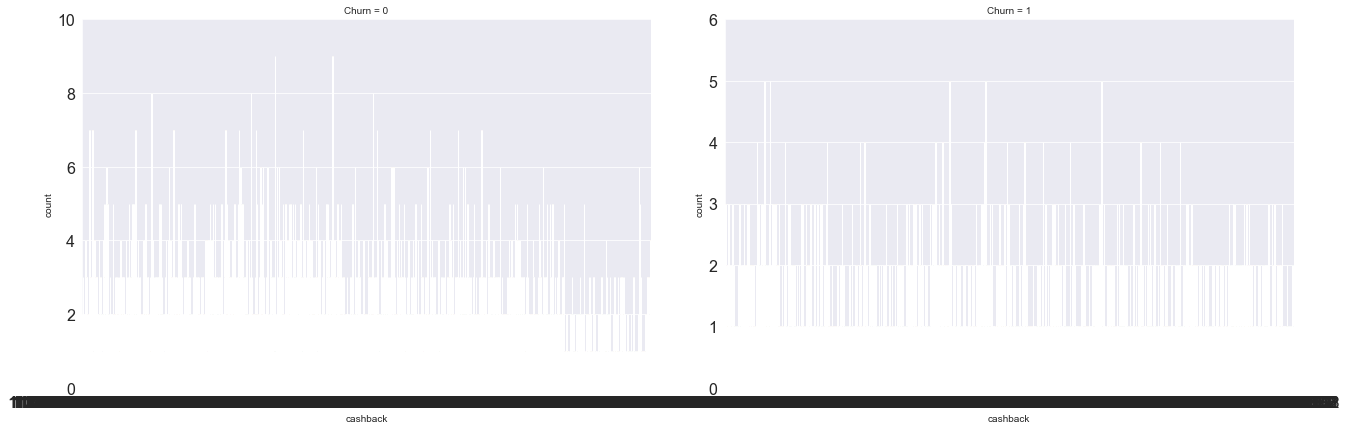

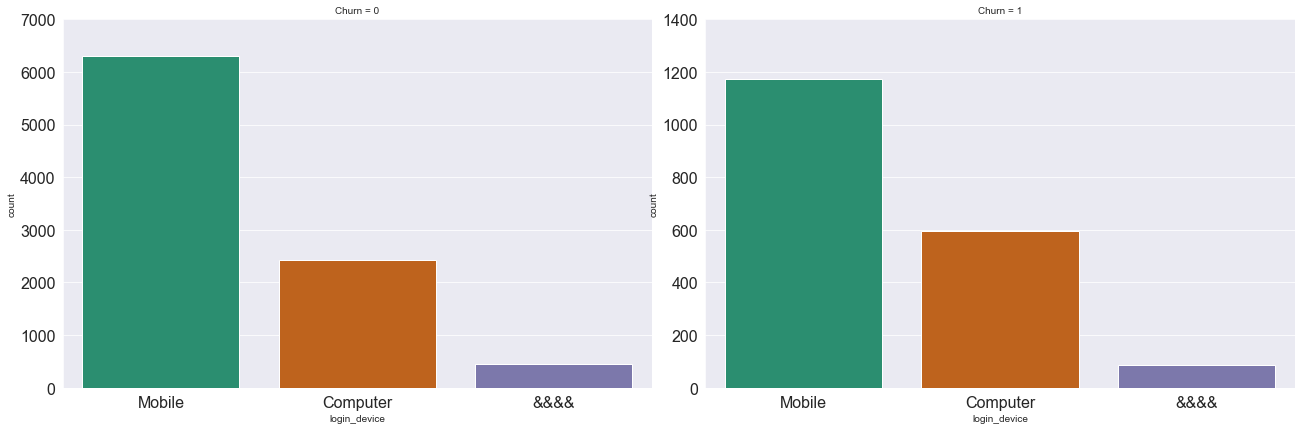

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize=(20, 70))
for col in df.drop('Churn', axis=1):
    g = sns.FacetGrid(df, col='Churn', size=6, aspect=1.5, sharey=False)
    g.map(sns.countplot, col, palette='Dark2')
    g.set_xticklabels(fontsize=16)
    g.set_yticklabels(fontsize=16)
    plt.show()
plt.tight_layout()


### Inference

#### account_tenure
* Majority of the customers who have churned are having 0 or 1 month tenure
* It is seen that customers with tenure more than 4 months are less likely to churn

#### city_tier
* City tier does not play significant role in churn, however customers from tier 3 are likely to churn than tier 1 or tier 2.

#### payment_method
* It can be noted that customers who have used Debit Card & Credit Card have churned more than other customers.
* Customers who are using UPI and Cash On Delivery are very less likely to churn.

#### gender
* The churn rate is higher in males than female customers

#### service_score
* It is very interesting to note that the customers who have given a service score of 3 are the ones who have churned higher in number
* We can also take it like the customer has neutral feeling towards the service provided by the company for the product.

#### customers_per_account
* Accounts having 5 customers are more likely to churn than others

#### account_segment
* Customers in the regular segment are very less likely to churn than others

#### cc_agent_score
* It is interesting to note that majority of the customers who have rated a score of 5 have churned, also those who have given a rating of 1 did not churn that much
* Customers who have given a rating of 3 are having equal chances of churning 

#### marital_status
* Customers who are divorced churned less than Single or Married

#### account_complaints_12m
* Majority of the Customers who have registered a compliant have churned

#### login_device
* Customers who are logging in via computer have churned more

# Multi Variate Analysis

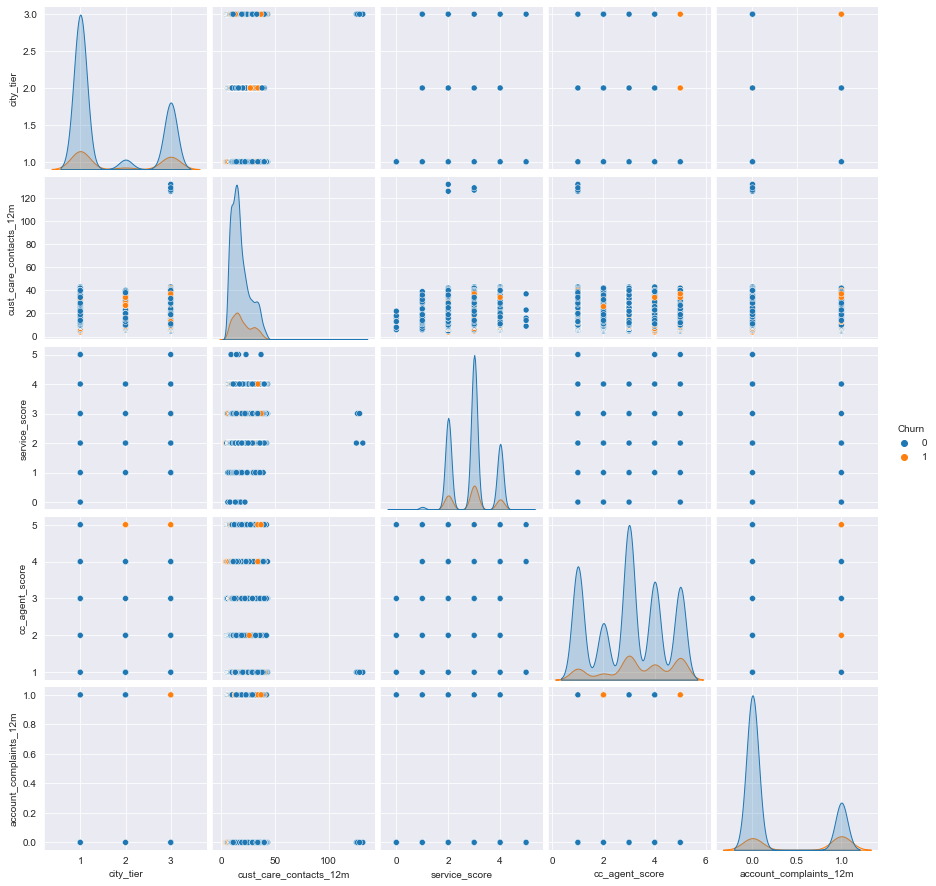

In [36]:
sns.pairplot(data=df, hue='Churn');

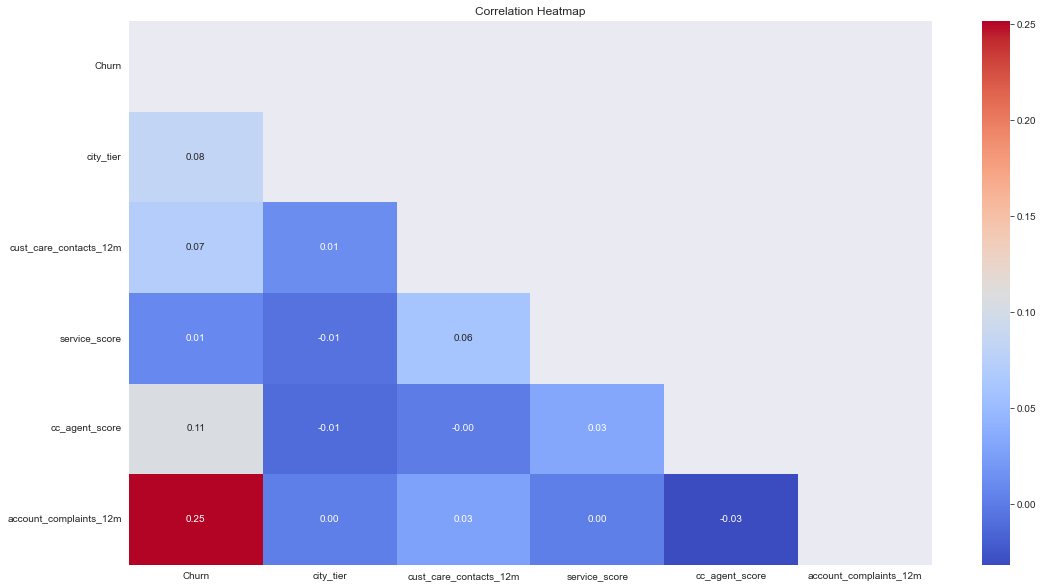

In [37]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Removing duplicates

In [38]:
# check for duplicate columns

print("Number of duplicate rows:", df.duplicated().sum())
df[df.duplicated()]

Number of duplicate rows: 259


Churn account_tenure  city_tier  cust_care_contacts_12m    payment_method  gender  service_score customers_per_account account_segment  cc_agent_score marital_Status revenue_per_month  account_complaints_12m rev_growth_yoy coupons_used days_since_cc_contact cashback login_device
1347      1              0        1.0                     8.0               UPI    Male            3.0                     4    Regular Plus             3.0         Single                 7                     1.0             15            0                     0    120.9       Mobile
1395      1             11        1.0                     6.0        Debit Card    Male            3.0                     4             HNI             3.0         Single                10                     1.0             13            0                     0   153.81       Mobile
1456      1              0        1.0                    13.0        Debit Card    Male            3.0                     5           Super             3.0         Single                 2                     1.0             24            1                     6   160.74     Computer
1485      1              0        1.0                    15.0       Credit Card  Female            2.0                     3    Regular Plus             5.0         Single                 8                     0.0             22            1                     4      142       Mobile
1498      0             18        1.0                    15.0        Debit Card    Male            2.0                     3           Super             4.0        Married                 9                     0.0             18            1                    15   123.48       Mobile
1514      0              5        1.0                    12.0        Debit Card    Male            2.0                     3    Regular Plus             3.0         Single                 4                     0.0             20            0                     4   130.38       Mobile
1516      1              0        3.0                     6.0  Cash on Delivery  Female            3.0                     5    Regular Plus             5.0         Single                 1                     0.0             21            1                     0   123.25     Computer
1542      0             15        1.0                    27.0       Credit Card  Female            2.0                     3           Super             3.0        Married                 3                     0.0             16            0                     2   152.65     Computer
1547      0              7        1.0                    16.0       Credit Card    Male            2.0                     3    Regular Plus             3.0        Married                 2                     1.0             17            2                     0   138.15     Computer
1568      0             11        3.0                     9.0        Debit Card    Male            3.0                     3             HNI             3.0        Married                 1                     0.0             12            1                    13   206.09       Mobile
1607      0              5        1.0                     8.0  Cash on Delivery    Male            2.0                     4           Super             5.0         Single                 5                     0.0             13            0                     4   121.76       Mobile
1619      0              0        1.0                     9.0       Credit Card    Male            3.0                     4    Regular Plus             3.0         Single                 2                     0.0             17            1                     0    132.3       Mobile
1635      0             22        1.0                    16.0        Debit Card  Female            2.0                     3         Regular             5.0         Single                10                     1.0             11            0                     2   286.65     Computer
17

In [39]:
print('Before removing the duplicate rows',df.shape)
df.drop_duplicates(inplace=True) 
print('After removing the duplicate rows',df.shape)

Before removing the duplicate rows (11260, 18)
After removing the duplicate rows (11001, 18)


In [40]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


# Data Pre-Processing

In [41]:
print('Before removing the duplicate rows',df.shape)
df.drop_duplicates(inplace=True) 
print('After removing the duplicate rows',df.shape)

Before removing the duplicate rows (11001, 18)
After removing the duplicate rows (11001, 18)


In [42]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [43]:
print('Number of missing values in each column')
df.isnull().sum()

Number of missing values in each column


Churn                       0
account_tenure            102
city_tier                 112
cust_care_contacts_12m    102
payment_method            109
gender                    108
service_score              98
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

## account_tenure Column

In [44]:
df["account_tenure"].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [45]:
df['account_tenure'] = df['account_tenure'].replace('#',np.NaN)

In [46]:
df['account_tenure'] = df['account_tenure'].astype('Int64')

In [47]:
df["account_tenure"].unique()

<IntegerArray>
[4, 0, 2, 13, 11, <NA>, 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1, 23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, 27, 12, 21, 17, 50, 60, 31, 51, 61]
Length: 38, dtype: Int64

<AxesSubplot:xlabel='account_tenure'>

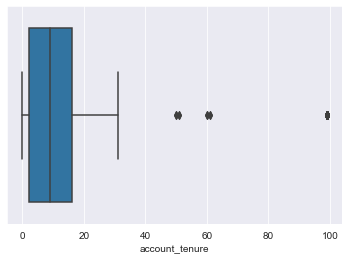

In [48]:
sns.boxplot(df['account_tenure'])

In [49]:
#It has outliers, so imputing the NaN values with median

df["account_tenure"] = df["account_tenure"].fillna(df["account_tenure"].median())
df["account_tenure"].unique()

<IntegerArray>
[4, 0, 2, 13, 11, 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1, 23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, 27, 12, 21, 17, 50, 60, 31, 51, 61]
Length: 37, dtype: Int64

In [50]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                 112
cust_care_contacts_12m    102
payment_method            109
gender                    108
service_score              98
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [51]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                 float64
cust_care_contacts_12m    float64
payment_method             object
gender                     object
service_score             float64
customers_per_account      object
account_segment            object
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

## city_tier Column

In [52]:
df["city_tier"].unique()

array([ 3.,  1., nan,  2.])

In [53]:
# Imputing with mode as its a categorical variable

df["city_tier"] = df["city_tier"].fillna(df["city_tier"].mode()[0])

In [54]:
df["city_tier"] = df["city_tier"].astype('Int64')

In [55]:
df["city_tier"].unique()

<IntegerArray>
[3, 1, 2]
Length: 3, dtype: Int64

In [56]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m    102
payment_method            109
gender                    108
service_score              98
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [57]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m    float64
payment_method             object
gender                     object
service_score             float64
customers_per_account      object
account_segment            object
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

## cust_care_contacts_12m Column

In [58]:
df["cust_care_contacts_12m"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

<AxesSubplot:xlabel='cust_care_contacts_12m'>

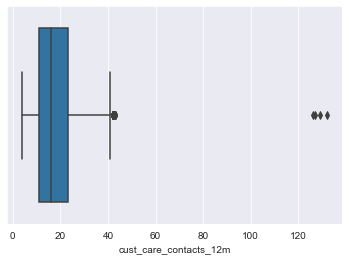

In [59]:
sns.boxplot(df["cust_care_contacts_12m"])

In [60]:
#It has outliers, so imputing the NaN values with median

df["cust_care_contacts_12m"] = df["cust_care_contacts_12m"].fillna(df["cust_care_contacts_12m"].median())
df["cust_care_contacts_12m"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  34.,   5.,   4., 126.,   7.,
        36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43., 129.])

In [61]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method            109
gender                    108
service_score              98
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [62]:
df["cust_care_contacts_12m"] = df["cust_care_contacts_12m"].astype('Int64')

In [63]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method             object
gender                     object
service_score             float64
customers_per_account      object
account_segment            object
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

## payment_method column

In [64]:
df["payment_method"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [65]:
df["payment_method"].value_counts()

Debit Card          4484
Credit Card         3441
E wallet            1195
Cash on Delivery     977
UPI                  795
Name: payment_method, dtype: int64

In [66]:
df["payment_method"] = df["payment_method"].fillna(df["payment_method"].mode()[0])

In [67]:
df["payment_method"] = df["payment_method"].replace('Debit Card','5')
df["payment_method"] = df["payment_method"].replace('Credit Card','4')
df["payment_method"] = df["payment_method"].replace('E wallet','3')
df["payment_method"] = df["payment_method"].replace('Cash on Delivery','2')
df["payment_method"] = df["payment_method"].replace('UPI','1')

In [68]:
df["payment_method"].value_counts()

5    4593
4    3441
3    1195
2     977
1     795
Name: payment_method, dtype: int64

In [69]:
df["payment_method"] = df["payment_method"].astype('float64')

In [70]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                     object
service_score             float64
customers_per_account      object
account_segment            object
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

## gender column

In [71]:
df["gender"].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [72]:
df["gender"].value_counts()

Male      6172
Female    4075
M          376
F          270
Name: gender, dtype: int64

In [73]:
df["gender"] = df["gender"].replace('Female','1')
df["gender"] = df["gender"].replace('F','1')
df["gender"] = df["gender"].replace('Male','2')
df["gender"] = df["gender"].replace('M','2')

In [74]:
df["gender"].unique()

array(['1', '2', nan], dtype=object)

In [75]:
df["gender"] = df["gender"].fillna(df["gender"].mode()[0])

In [76]:
df["gender"].value_counts()

2    6656
1    4345
Name: gender, dtype: int64

In [77]:
df["gender"] = df["gender"].astype('float64')

In [78]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score              98
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [79]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account      object
account_segment            object
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

## service_score column

In [80]:
df["service_score"].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [81]:
df["service_score"].value_counts()

3.0    5360
2.0    3183
4.0    2270
1.0      77
0.0       8
5.0       5
Name: service_score, dtype: int64

In [82]:
# imputing the missing values as service-score is a categorical ordinal variable

df["service_score"] = df["service_score"].fillna(df["service_score"].mode()[0])

In [83]:
df["service_score"].unique()

array([3., 2., 1., 0., 4., 5.])

In [84]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account     112
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

## customers_per_account column

In [85]:
df["customers_per_account"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [86]:
df["customers_per_account"].value_counts()

4    4454
3    3181
5    1665
2     517
1     435
@     332
6     305
Name: customers_per_account, dtype: int64

In [87]:
df["customers_per_account"] = df["customers_per_account"].replace('@',np.NaN)

In [88]:
df["customers_per_account"].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

<AxesSubplot:xlabel='customers_per_account'>

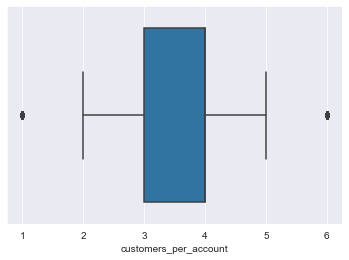

In [89]:
sns.boxplot(df["customers_per_account"])

In [90]:
df["customers_per_account"] = df["customers_per_account"].fillna(df["customers_per_account"].median())

In [91]:
df["customers_per_account"].value_counts()

4.0    4898
3.0    3181
5.0    1665
2.0     517
1.0     435
6.0     305
Name: customers_per_account, dtype: int64

In [92]:
df["customers_per_account"] = df["customers_per_account"].astype('float64')

In [93]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment            97
cc_agent_score            116
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [94]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment            object
cc_agent_score            float64
marital_Status             object
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

## cc_agent_score column

In [95]:
df["cc_agent_score"].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [96]:
df["cc_agent_score"].value_counts()

3.0    3270
1.0    2261
5.0    2126
4.0    2064
2.0    1164
Name: cc_agent_score, dtype: int64

In [97]:
df["cc_agent_score"] = df["cc_agent_score"].fillna(df["cc_agent_score"].mode()[0])

In [98]:
df["cc_agent_score"].unique()

array([2., 3., 5., 4., 1.])

In [99]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment            97
cc_agent_score              0
marital_Status            211
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

## marital_Status column

In [100]:
df["marital_Status"].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [101]:
df["marital_Status"].value_counts()

Married     5710
Single      3412
Divorced    1668
Name: marital_Status, dtype: int64

In [102]:
df["marital_Status"] = df["marital_Status"].fillna(df["marital_Status"].mode()[0])

In [103]:
df["marital_Status"].value_counts()

Married     5921
Single      3412
Divorced    1668
Name: marital_Status, dtype: int64

In [104]:
df["marital_Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [105]:
df["marital_Status"] = df["marital_Status"].replace('Divorced','1')
df["marital_Status"] = df["marital_Status"].replace('Single','2')
df["marital_Status"] = df["marital_Status"].replace('Married','3')

In [106]:
df["marital_Status"] = df["marital_Status"].astype('float64')

In [107]:
df["marital_Status"].unique()

array([2., 1., 3.])

In [108]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment            97
cc_agent_score              0
marital_Status              0
revenue_per_month         102
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [109]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment            object
cc_agent_score            float64
marital_Status            float64
revenue_per_month          object
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

## revenue_per_month column

In [110]:
df["revenue_per_month"].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [111]:
df[df["revenue_per_month"]=='+'].shape

(689, 18)

In [112]:
df["revenue_per_month"] = df["revenue_per_month"].replace('+',np.NaN)

In [113]:
df["revenue_per_month"].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [114]:
df["revenue_per_month"] = df["revenue_per_month"].fillna(df["revenue_per_month"].median())

In [115]:
df["revenue_per_month"] = df["revenue_per_month"].astype('float64')

In [116]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment            97
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m    357
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [117]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment            object
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy             object
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

## account_complaints_12m column

In [118]:
df["account_complaints_12m"].unique()

array([ 1.,  0., nan])

In [119]:
df["account_complaints_12m"] = df["account_complaints_12m"].fillna(df["account_complaints_12m"].mode()[0])

In [120]:
df["account_complaints_12m"].unique()

array([1., 0.])

In [121]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment            97
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m      0
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

## rev_growth_yoy column

In [122]:
df["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [123]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)

In [124]:
df["rev_growth_yoy"].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [125]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median())

In [126]:
df["rev_growth_yoy"].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26.,  4., 27., 28.])

In [127]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype('float64')

In [128]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment            97
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m      0
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [129]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment            object
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used               object
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

## coupons_used column

In [130]:
df["coupons_used"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [131]:
df['coupons_used'] = df['coupons_used'].replace('#',np.NaN)
df['coupons_used'] = df['coupons_used'].replace('$',np.NaN)
df['coupons_used'] = df['coupons_used'].replace('*',np.NaN)

In [132]:
df["coupons_used"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [133]:
df["coupons_used"] = df["coupons_used"].fillna(df["coupons_used"].median())

In [134]:
df["coupons_used"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., 14., 16.])

In [135]:
df["coupons_used"] = df["coupons_used"].astype('float64')

In [136]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment            97
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m      0
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [137]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment            object
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used              float64
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

## account_segment column

In [138]:
df["account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [139]:
df["account_segment"].value_counts()

Super           3961
Regular Plus    3752
HNI             1615
Super Plus       756
Regular          511
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [140]:
df.groupby('account_segment')[['revenue_per_month']].describe().T

account_segment                  HNI     Regular  Regular +  Regular Plus        Super  Super +  Super Plus
revenue_per_month count  1615.000000  511.000000      262.0   3752.000000  3961.000000     47.0  756.000000
                  mean      6.754799    6.808219        5.0      5.956290     6.360767      5.0    7.144180
                  std      12.473687   11.676288        0.0     12.100495    11.240366      0.0   12.086076
                  min       1.000000    1.000000        5.0      1.000000     1.000000      5.0    1.000000
                  25%       3.000000    4.000000        5.0      3.000000     3.000000      5.0    4.000000
                  50%       5.000000    5.000000        5.0      4.000000     5.000000      5.0    5.000000
                  75%       7.000000    8.000000        5.0      6.000000     7.000000      5.0    8.000000
                  max     137.000000  136.000000        5.0    140.000000   140.000000      5.0  137.000000

In [141]:
df.groupby('account_segment')[['rev_growth_yoy']].describe().T

account_segment               HNI     Regular   Regular +  Regular Plus        Super    Super +  Super Plus
rev_growth_yoy count  1615.000000  511.000000  262.000000   3752.000000  3961.000000  47.000000  756.000000
               mean     16.250774   15.395303   16.156489     16.325959    16.158798  15.680851   16.373016
               std       3.871818    3.452237    3.983002      3.734467     3.688335   4.091913    4.093091
               min       4.000000    4.000000   11.000000     11.000000    11.000000  11.000000   11.000000
               25%      13.000000   13.000000   13.000000     13.000000    13.000000  13.000000   13.000000
               50%      15.000000   15.000000   15.000000     15.000000    15.000000  14.000000   15.000000
               75%      19.000000   17.000000   19.000000     19.000000    19.000000  18.000000   19.000000
               max      28.000000   26.000000   28.000000     28.000000    28.000000  27.000000   28.000000

In [142]:
# Account segment is ordinal with the descending order as follows
# HNI -> Super Plus -> Super -> Regular Plus -> Regular

df["account_segment"] = df['account_segment'].replace('HNI','5')
df["account_segment"] = df['account_segment'].replace('Super Plus','4')
df["account_segment"] = df['account_segment'].replace('Super +','4')
df["account_segment"] = df['account_segment'].replace('Super','3')
df["account_segment"] = df['account_segment'].replace('Regular Plus','2')
df["account_segment"] = df['account_segment'].replace('Regular +','2')
df["account_segment"] = df['account_segment'].replace('Regular','1')


In [143]:
df["account_segment"].unique()

array(['3', '2', '1', '5', nan, '4'], dtype=object)

In [144]:
df['account_segment'] = df['account_segment'].fillna(df['account_segment'].mode()[0])

In [145]:
df["account_segment"].unique()

array(['3', '2', '1', '5', '4'], dtype=object)

In [146]:
df['account_segment'] = df['account_segment'].astype('float64')

In [147]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment             0
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m      0
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact     357
cashback                  471
login_device              221
dtype: int64

In [148]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used              float64
days_since_cc_contact      object
cashback                   object
login_device               object
dtype: object

## days_since_cc_contact column

In [149]:
df["days_since_cc_contact"].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [150]:
df["days_since_cc_contact"] = df["days_since_cc_contact"].replace('$',np.NaN)

In [151]:
df["days_since_cc_contact"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [152]:
df["days_since_cc_contact"] = df["days_since_cc_contact"].fillna(df["days_since_cc_contact"].median())

In [153]:
df["days_since_cc_contact"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., 11., 10.,  9.,
       13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [154]:
df["days_since_cc_contact"] = df["days_since_cc_contact"].astype('float64')

In [155]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment             0
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m      0
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact       0
cashback                  471
login_device              221
dtype: int64

In [156]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used              float64
days_since_cc_contact     float64
cashback                   object
login_device               object
dtype: object

## cashback column

In [157]:
# These entries must be replaced with median

df[df['cashback']=='$']

Churn  account_tenure  city_tier  cust_care_contacts_12m  payment_method  gender  service_score  customers_per_account  account_segment  cc_agent_score  marital_Status  revenue_per_month  account_complaints_12m  rev_growth_yoy  coupons_used  days_since_cc_contact cashback login_device
440       0               0          1                      16             4.0     2.0            3.0                    2.0              2.0             3.0             2.0                2.0                     0.0            18.0           1.0                    2.0        $       Mobile
1257      0               4          1                       9             4.0     2.0            2.0                    3.0              2.0             5.0             3.0                5.0                     0.0            13.0           0.0                    3.0        $     Computer

In [158]:
df['cashback'] = df['cashback'].replace('$',np.NaN)

In [159]:
df[df['cashback']=='$']

Empty DataFrame
Columns: [Churn, account_tenure, city_tier, cust_care_contacts_12m, payment_method, gender, service_score, customers_per_account, account_segment, cc_agent_score, marital_Status, revenue_per_month, account_complaints_12m, rev_growth_yoy, coupons_used, days_since_cc_contact, cashback, login_device]
Index: []

In [160]:
df['cashback'] = df['cashback'].fillna(df['cashback'].median())

In [161]:
df['cashback'].unique()

array([159.93, 120.9 , 165.63, ..., 227.36, 226.91, 191.42])

In [162]:
df['cashback'] = df['cashback'].astype('float64')

In [163]:
df.isnull().sum()

Churn                       0
account_tenure              0
city_tier                   0
cust_care_contacts_12m      0
payment_method              0
gender                      0
service_score               0
customers_per_account       0
account_segment             0
cc_agent_score              0
marital_Status              0
revenue_per_month           0
account_complaints_12m      0
rev_growth_yoy              0
coupons_used                0
days_since_cc_contact       0
cashback                    0
login_device              221
dtype: int64

In [164]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used              float64
days_since_cc_contact     float64
cashback                  float64
login_device               object
dtype: object

## login_device column

In [165]:
df["login_device"].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [166]:
df["login_device"] = df["login_device"].replace('&&&&',np.NaN)

In [167]:
df["login_device"].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [168]:
df["login_device"] = df["login_device"].fillna(df["login_device"].mode()[0])

In [169]:
df["login_device"].unique()

array(['Mobile', 'Computer'], dtype=object)

In [170]:
df["login_device"].value_counts()

Mobile      8068
Computer    2933
Name: login_device, dtype: int64

In [171]:
df["login_device"] = df["login_device"].replace('Mobile','1')
df["login_device"] = df["login_device"].replace('Computer','2')

In [172]:
df["login_device"].unique()

array(['1', '2'], dtype=object)

In [173]:
df["login_device"] = df["login_device"].astype('float64')

In [174]:
print('Null values after pre-processing')
df.isnull().sum()

Null values after pre-processing


Churn                     0
account_tenure            0
city_tier                 0
cust_care_contacts_12m    0
payment_method            0
gender                    0
service_score             0
customers_per_account     0
account_segment           0
cc_agent_score            0
marital_Status            0
revenue_per_month         0
account_complaints_12m    0
rev_growth_yoy            0
coupons_used              0
days_since_cc_contact     0
cashback                  0
login_device              0
dtype: int64

In [175]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used              float64
days_since_cc_contact     float64
cashback                  float64
login_device              float64
dtype: object

### Outlier proportion

In [176]:
# function to calculate outlier proportion
def get_outlier_proportion(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    #calculation for proportion
    temp=[]
    for i in col:
        if (i>upper_range) or (i<lower_range):
            temp.append(i)
    proportion = len(temp)/len(col)
    return proportion

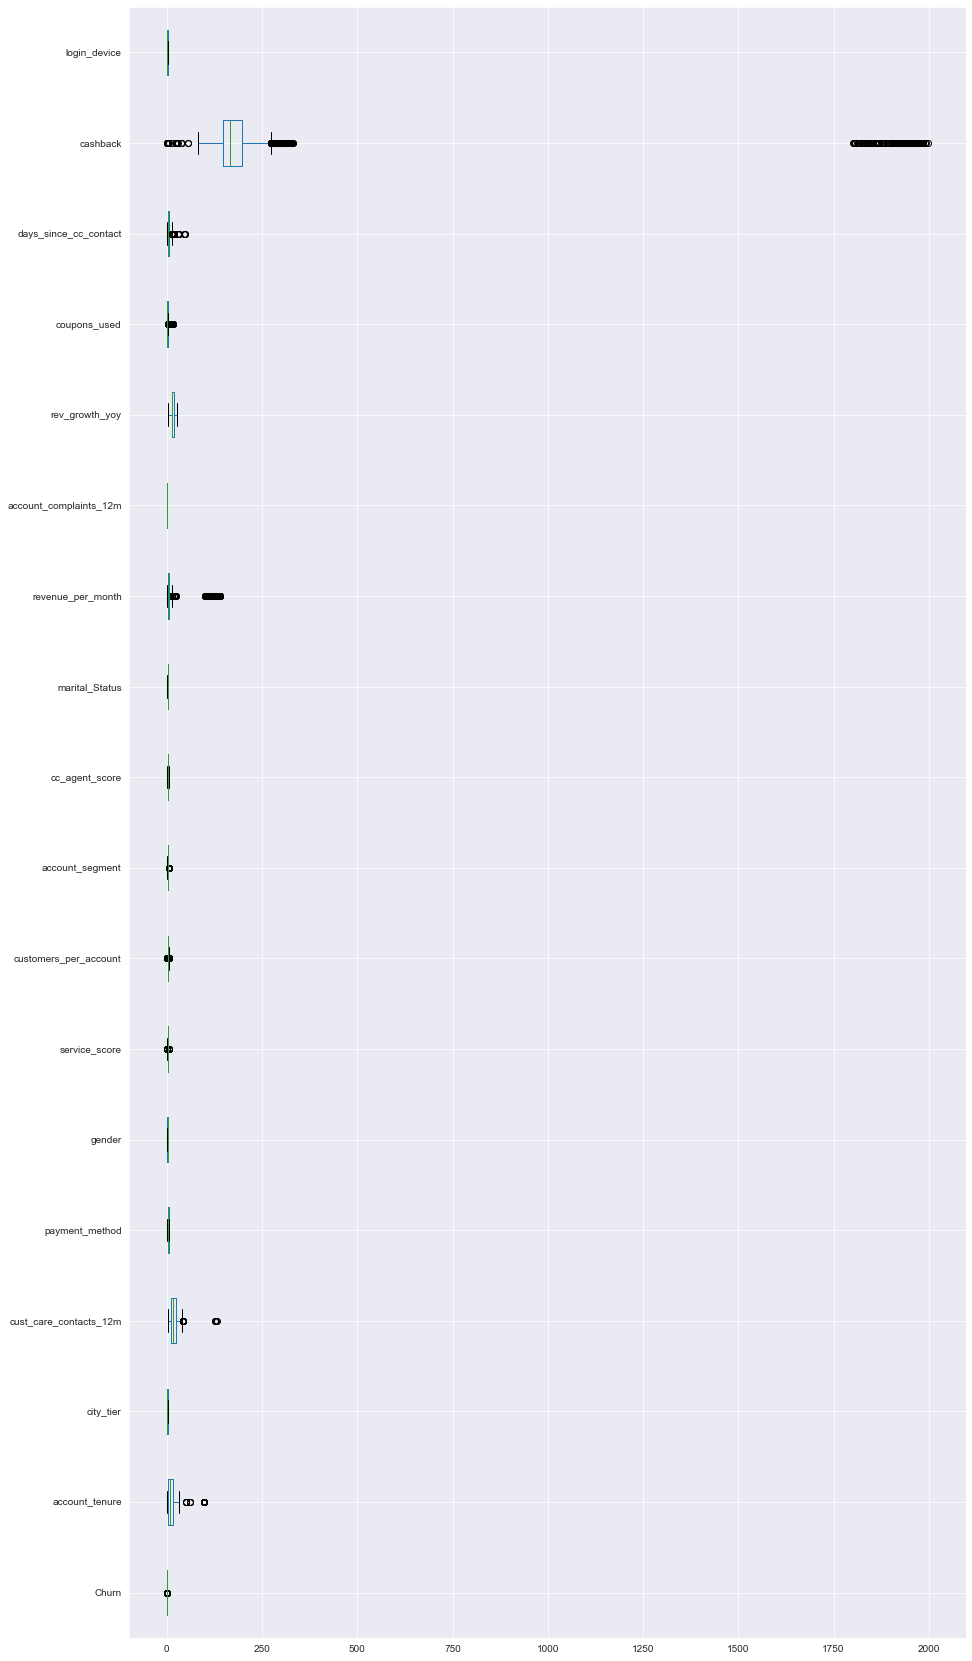

In [177]:
#Boxplot to check outliers
plt.figure(figsize=(15,30))
df.boxplot(vert=False)
plt.show()

In [178]:
def hist_boxplot(column,nbins):
    plt.figure()
    print('\033[1m'+ "Distribution of " + column + '\033[0m' + '\n')
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "BoxPlot of " + column + '\033[0m' + '\n')
    ax = sns.boxplot(x=df[column])
    plt.show()
    print("----------------------------------------------------------------------------")
    

Distribution of Churn



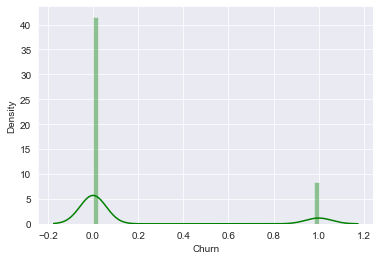

----------------------------------------------------------------------------
BoxPlot of Churn



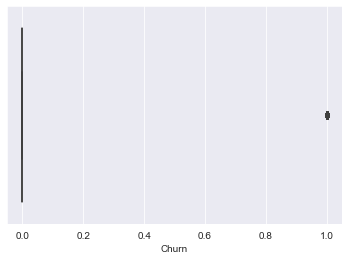

----------------------------------------------------------------------------
Distribution of account_tenure



----------------------------------------------------------------------------
BoxPlot of account_tenure



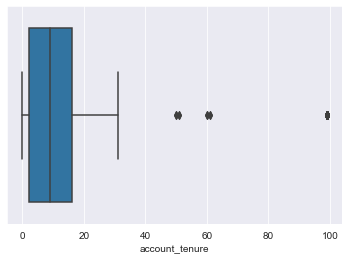

----------------------------------------------------------------------------
Distribution of city_tier



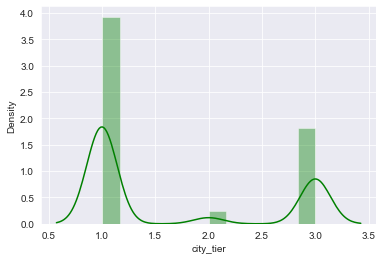

----------------------------------------------------------------------------
BoxPlot of city_tier



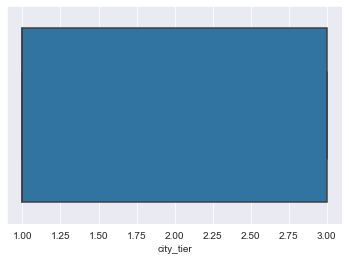

----------------------------------------------------------------------------
Distribution of cust_care_contacts_12m



----------------------------------------------------------------------------
BoxPlot of cust_care_contacts_12m



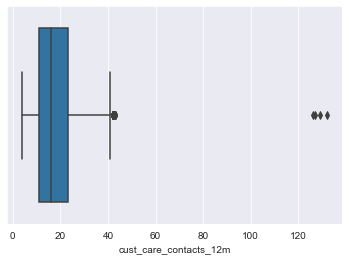

----------------------------------------------------------------------------
Distribution of payment_method



----------------------------------------------------------------------------
BoxPlot of payment_method



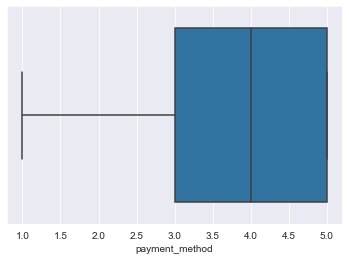

----------------------------------------------------------------------------
Distribution of gender



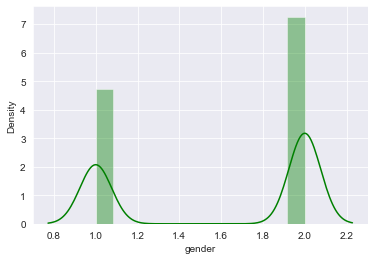

----------------------------------------------------------------------------
BoxPlot of gender



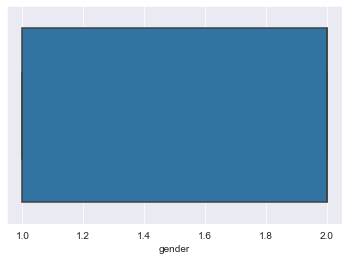

----------------------------------------------------------------------------
Distribution of service_score



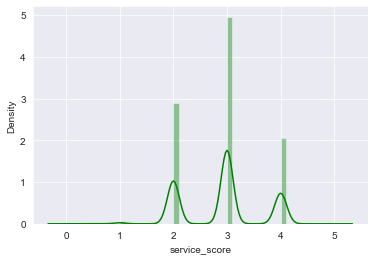

----------------------------------------------------------------------------
BoxPlot of service_score



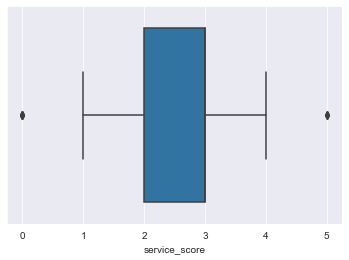

----------------------------------------------------------------------------
Distribution of customers_per_account



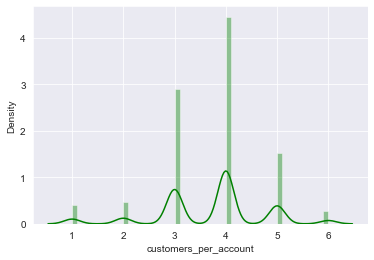

----------------------------------------------------------------------------
BoxPlot of customers_per_account



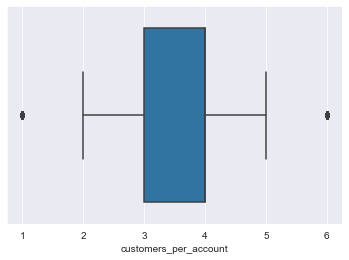

----------------------------------------------------------------------------
Distribution of account_segment



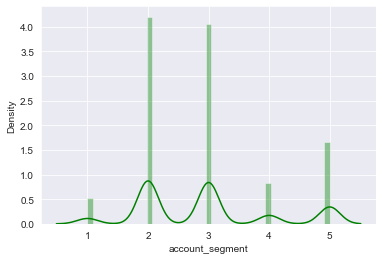

----------------------------------------------------------------------------
BoxPlot of account_segment



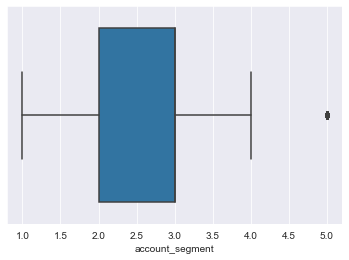

----------------------------------------------------------------------------
Distribution of cc_agent_score



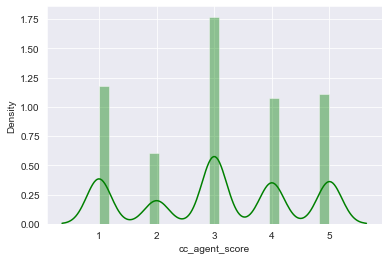

----------------------------------------------------------------------------
BoxPlot of cc_agent_score



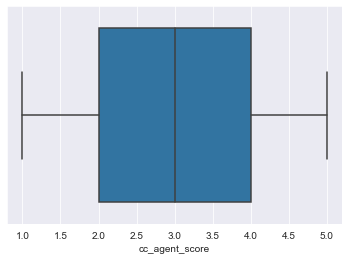

----------------------------------------------------------------------------
Distribution of marital_Status



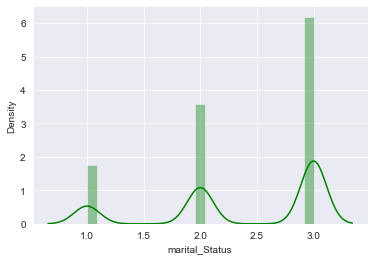

----------------------------------------------------------------------------
BoxPlot of marital_Status



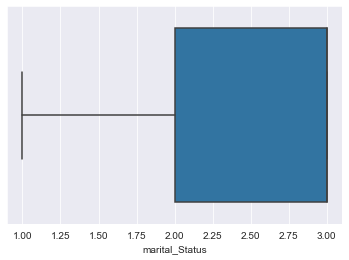

----------------------------------------------------------------------------
Distribution of revenue_per_month



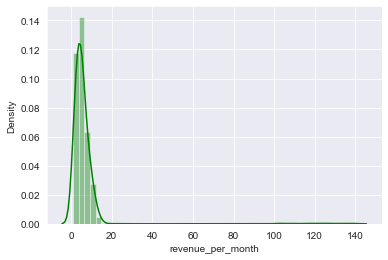

----------------------------------------------------------------------------
BoxPlot of revenue_per_month



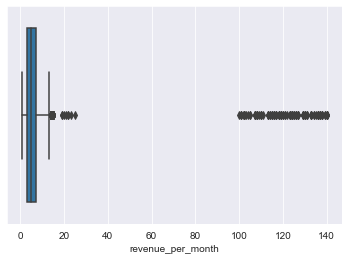

----------------------------------------------------------------------------
Distribution of account_complaints_12m



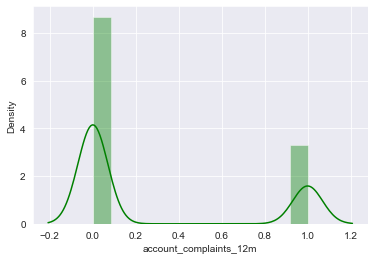

----------------------------------------------------------------------------
BoxPlot of account_complaints_12m



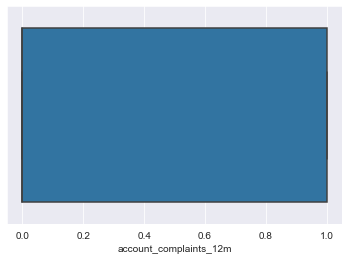

----------------------------------------------------------------------------
Distribution of rev_growth_yoy



----------------------------------------------------------------------------
BoxPlot of rev_growth_yoy



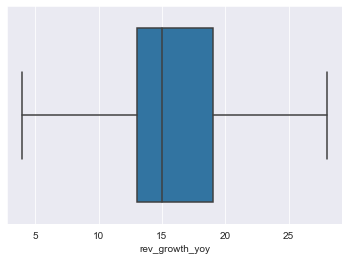

----------------------------------------------------------------------------
Distribution of coupons_used



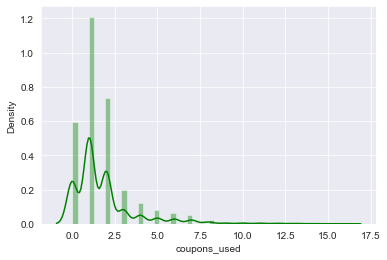

----------------------------------------------------------------------------
BoxPlot of coupons_used



----------------------------------------------------------------------------
Distribution of days_since_cc_contact



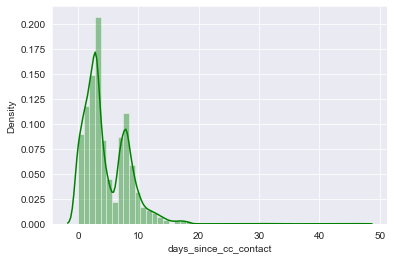

----------------------------------------------------------------------------
BoxPlot of days_since_cc_contact



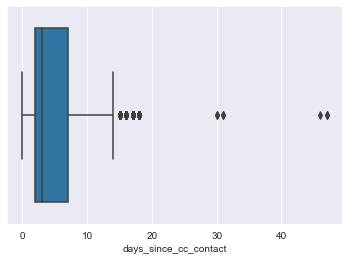

----------------------------------------------------------------------------
Distribution of cashback



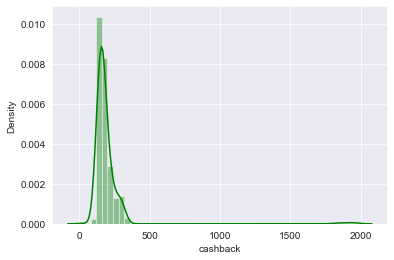

----------------------------------------------------------------------------
BoxPlot of cashback



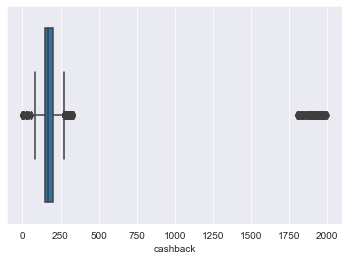

----------------------------------------------------------------------------
Distribution of login_device



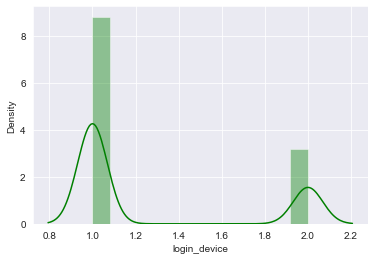

----------------------------------------------------------------------------
BoxPlot of login_device



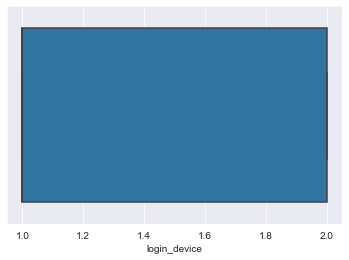

----------------------------------------------------------------------------


In [179]:
for column in list(df.select_dtypes(exclude='object').columns):
    hist_boxplot(column,20)

In [180]:

print('Proportion of outliers')
for i in df.columns:
    print('{column}: {proportion:.2f}%'.format(column=i,proportion=(get_outlier_proportion(df[i])*100)))


Proportion of outliers
Churn: 16.83%
account_tenure: 1.26%
city_tier: 0.00%
cust_care_contacts_12m: 0.38%
payment_method: 0.00%
gender: 0.00%
service_score: 0.12%
customers_per_account: 6.73%
account_segment: 14.68%
cc_agent_score: 0.00%
marital_Status: 0.00%
revenue_per_month: 1.68%
account_complaints_12m: 0.00%
rev_growth_yoy: 0.00%
coupons_used: 12.42%
days_since_cc_contact: 1.16%
cashback: 8.59%
login_device: 0.00%


In [181]:
# lets check the percentage of outlier in each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_prop = pd.DataFrame((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/df.shape[0]*100), columns = ['Outlier %'], index = None). round(2)

outlier_prop.sort_values(by='Outlier %', ascending = False)

Outlier %
Churn                       16.83
account_segment             14.68
coupons_used                12.42
cashback                     8.59
customers_per_account        6.73
revenue_per_month            1.68
account_tenure               1.26
days_since_cc_contact        1.16
cust_care_contacts_12m       0.38
service_score                0.12
account_complaints_12m       0.00
rev_growth_yoy               0.00
cc_agent_score               0.00
marital_Status               0.00
gender                       0.00
payment_method               0.00
city_tier                    0.00
login_device                 0.00

#### Inference

* We are only concerned about the actual numeric columns
* Columns customer_per_account, coupons_used, cashback are having more than 5% of their values as outliers.

In [182]:
# Checking the skewness of the columns
num_cols = ['account_tenure','cust_care_contacts_12m','customers_per_account','revenue_per_month', 'account_complaints_12m', 'rev_growth_yoy', 'coupons_used', 'days_since_cc_contact', 'cashback']
cols = ['Skewness']
pd.DataFrame(df[num_cols].skew(skipna=True).round(2), columns=cols)

Skewness
account_tenure              3.94
cust_care_contacts_12m      1.44
customers_per_account      -0.44
revenue_per_month           9.35
account_complaints_12m      1.00
rev_growth_yoy              0.75
coupons_used                2.55
days_since_cc_contact       1.33
cashback                    8.88

In [183]:
# function to remove outliers

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [184]:
df.nunique()

Churn                        2
account_tenure              37
city_tier                    3
cust_care_contacts_12m      44
payment_method               5
gender                       2
service_score                6
customers_per_account        6
account_segment              5
cc_agent_score               5
marital_Status               3
revenue_per_month           58
account_complaints_12m       2
rev_growth_yoy              19
coupons_used                17
days_since_cc_contact       23
cashback                  5693
login_device                 2
dtype: int64

In [185]:
remove_outlier_columns = ['account_tenure','cust_care_contacts_12m','customers_per_account','revenue_per_month','coupons_used', 'days_since_cc_contact', 'cashback']

for column in remove_outlier_columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [186]:
df.dtypes

Churn                       int64
account_tenure             object
city_tier                   Int64
cust_care_contacts_12m     object
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used              float64
days_since_cc_contact     float64
cashback                  float64
login_device              float64
dtype: object

In [187]:
df['account_tenure'] = df['account_tenure'].astype('Int64')
df['cust_care_contacts_12m'] = df['cust_care_contacts_12m'].astype('Int64')

In [188]:
df.dtypes

Churn                       int64
account_tenure              Int64
city_tier                   Int64
cust_care_contacts_12m      Int64
payment_method            float64
gender                    float64
service_score             float64
customers_per_account     float64
account_segment           float64
cc_agent_score            float64
marital_Status            float64
revenue_per_month         float64
account_complaints_12m    float64
rev_growth_yoy            float64
coupons_used              float64
days_since_cc_contact     float64
cashback                  float64
login_device              float64
dtype: object

In [189]:
# lets check the percentage of outlier in each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_prop = pd.DataFrame((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/df.shape[0]*100), columns = ['Outlier %'], index = None). round(2)

outlier_prop.sort_values(by='Outlier %', ascending = False)


Outlier %
Churn                       16.83
account_segment             14.68
service_score                0.12
marital_Status               0.00
cashback                     0.00
days_since_cc_contact        0.00
coupons_used                 0.00
rev_growth_yoy               0.00
account_complaints_12m       0.00
revenue_per_month            0.00
cc_agent_score               0.00
account_tenure               0.00
customers_per_account        0.00
gender                       0.00
payment_method               0.00
cust_care_contacts_12m       0.00
city_tier                    0.00
login_device                 0.00

# EDA on the Cleaned Data

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn                   11001 non-null  int64  
 1   account_tenure          11001 non-null  Int64  
 2   city_tier               11001 non-null  Int64  
 3   cust_care_contacts_12m  11001 non-null  Int64  
 4   payment_method          11001 non-null  float64
 5   gender                  11001 non-null  float64
 6   service_score           11001 non-null  float64
 7   customers_per_account   11001 non-null  float64
 8   account_segment         11001 non-null  float64
 9   cc_agent_score          11001 non-null  float64
 10  marital_Status          11001 non-null  float64
 11  revenue_per_month       11001 non-null  float64
 12  account_complaints_12m  11001 non-null  float64
 13  rev_growth_yoy          11001 non-null  float64
 14  coupons_used            11001 non-null

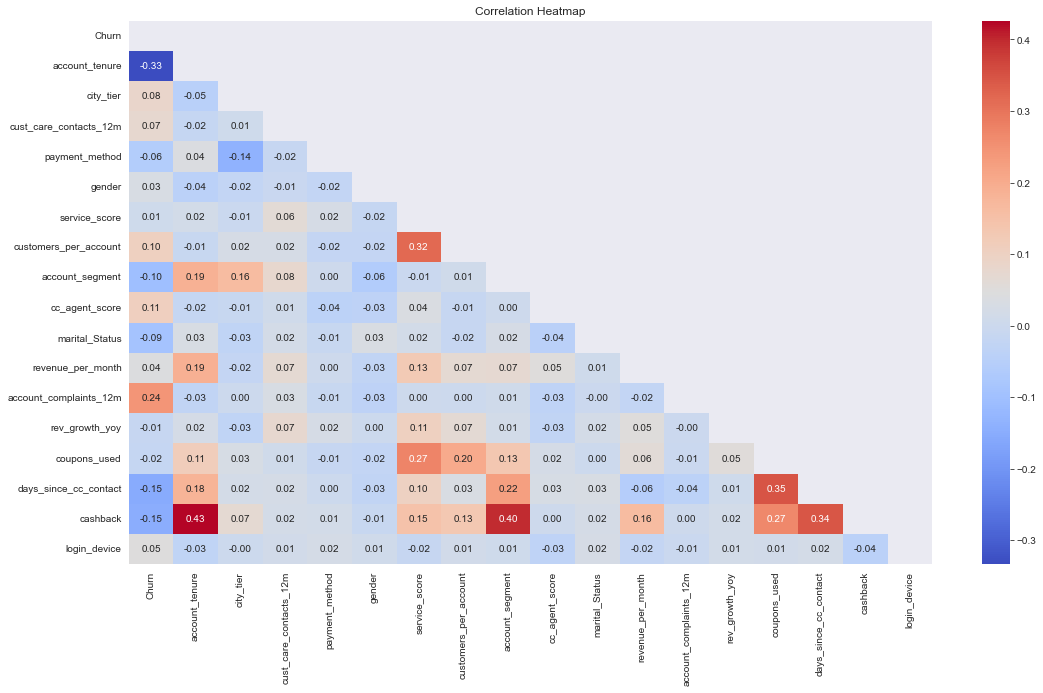

In [191]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scaling of data

In [192]:
df.describe().T[['min','max','std']]

min      max        std
Churn                      0.0      1.0   0.374192
account_tenure             0.0     37.0   8.910558
city_tier                  1.0      3.0   0.913608
cust_care_contacts_12m     4.0     41.0   8.574801
payment_method             1.0      5.0   1.234744
gender                     1.0      2.0   0.488865
service_score              0.0      5.0   0.722796
customers_per_account      1.5      5.5   0.924405
account_segment            1.0      5.0   1.099918
cc_agent_score             1.0      5.0   1.373116
marital_Status             1.0      3.0   0.735143
revenue_per_month          1.0     13.0    2.88047
account_complaints_12m     0.0      1.0   0.447297
rev_growth_yoy             4.0     28.0   3.759624
coupons_used               0.0      3.5   1.104993
days_since_cc_contact      0.0     14.5   3.492314
cashback                72.995  273.195  43.944101
login_device               1.0      2.0   0.442208

In [193]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [194]:
# Creating an object for the StandardScaler function
scaler = StandardScaler()

In [195]:
num_col = df[['Churn','account_tenure','city_tier','service_score','cc_agent_score','cashback','revenue_per_month','days_since_cc_contact','cust_care_contacts_12m','rev_growth_yoy',]]

In [196]:
num_col.head()

Churn  account_tenure  city_tier  service_score  cc_agent_score  cashback  revenue_per_month  days_since_cc_contact  cust_care_contacts_12m  rev_growth_yoy
0      1               4          3            3.0             2.0    159.93                9.0                    5.0                       6            11.0
1      1               0          1            3.0             3.0    120.90                7.0                    0.0                       8            15.0
2      1               0          1            2.0             3.0    165.63                6.0                    3.0                      30            14.0
3      1               0          3            2.0             5.0    134.07                8.0                    3.0                      15            23.0
4      1               0          1            2.0             5.0    129.60                3.0                    3.0                      12            11.0

In [197]:
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [198]:
scaled_df.head()

Churn  account_tenure  city_tier  cust_care_contacts_12m  payment_method    gender  service_score  customers_per_account  account_segment  cc_agent_score  marital_Status  revenue_per_month  account_complaints_12m  rev_growth_yoy  coupons_used  days_since_cc_contact  cashback  login_device
0  2.222626       -0.704189   1.479979               -1.380526        0.879200 -1.237690       0.135956              -0.769108         0.090912       -0.770012        -0.52591           1.295405                 1.61752       -1.384988     -0.436018               0.126480 -0.404288     -0.602939
1  2.222626       -1.153115  -0.709243               -1.147274       -2.360486  0.807957       0.135956               0.312718        -0.818288       -0.041708        -0.52591           0.601043                 1.61752       -0.321004     -1.341042              -1.305301 -1.292502     -0.602939
2  2.222626       -1.153115  -0.709243                1.418500        0.879200  0.807957      -1.247623               0.312718        -0.818288       -0.041708        -0.52591           0.253861                 1.61752       -0.587000     -1.341042              -0.446232 -0.274572     -0.602939
3  2.222626       -1.153115   1.479979               -0.330891        0.879200  0.807957      -1.247623               0.312718         0.090912        1.414899        -0.52591           0.948224                -0.61823        1.806965     -1.341042              -0.446232 -0.992790     -0.602939
4  2.222626       -1.153115  -0.709243               -0.680769        0.069279  0.807957      -1.247623              -0.769108        -0.818288        1.414899        -0.52591          -0.787683                -0.61823       -1.384988     -0.436018              -0.446232 -1.094515     -0.602939

In [199]:
scaled_df.describe().T[['min','max','std']]

min       max       std
Churn                  -0.449918  2.222626  1.000045
account_tenure         -1.153115  2.999451  1.000045
city_tier              -0.709243  1.479979  1.000045
cust_care_contacts_12m -1.613778  2.701387  1.000045
payment_method         -2.360486  0.879200  1.000045
gender                 -1.237690  0.807957  1.000045
service_score          -4.014781  2.903113  1.000045
customers_per_account  -2.391847  1.935456  1.000045
account_segment        -1.727489  1.909312  1.000045
cc_agent_score         -1.498316  1.414899  1.000045
marital_Status         -1.886251  0.834432  1.000045
revenue_per_month      -1.482046  2.684131  1.000045
account_complaints_12m -0.618230  1.617520  1.000045
rev_growth_yoy         -3.246961  3.136945  1.000045
coupons_used           -1.341042  1.826544  1.000045
days_since_cc_contact  -1.305301  2.846863  1.000045
cashback               -2.382687  2.173308  1.000045
login_device           -0.602939  1.658544  1.000045

# 4. Business insights from EDA
a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business 

b) Any business insights using clustering (if applicable) 

c) Any other business insights

In [200]:
# checking the target variable - churn column for imbalance

plt.figure(figsize=(12,8))

# bar plot

ax1 = plt.subplot(1,2,1)
countplot = sns.countplot(x=df['Churn'])

ax2 = plt.subplot(1,2,2)
plt.pie(x=df['Churn'].value_counts(), labels= list(df['Churn'].value_counts().index), autopct='%1.2f%%')

plt.show()

# Scaling the data

In [201]:
# Performing SMOTE to balance data

In [202]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [203]:
df1 = df.copy()

In [204]:
for col in df.columns:
    df1[col] = MinMaxScaler().fit_transform(df1[[col]])

In [205]:
df1

Churn  account_tenure  city_tier  cust_care_contacts_12m  payment_method  gender  service_score  customers_per_account  account_segment  cc_agent_score  marital_Status  revenue_per_month  account_complaints_12m  rev_growth_yoy  coupons_used  days_since_cc_contact  cashback  login_device
0        1.0        0.108108        1.0                0.054054            1.00     0.0            0.6                  0.375             0.50            0.25             0.5           0.666667                     1.0        0.291667      0.285714               0.344828  0.434241           0.0
1        1.0        0.000000        0.0                0.108108            0.00     1.0            0.6                  0.625             0.25            0.50             0.5           0.500000                     1.0        0.458333      0.000000               0.000000  0.239286           0.0
2        1.0        0.000000        0.0                0.702703            1.00     1.0            0.4                  0.625             0.25            0.50             0.5           0.416667                     1.0        0.416667      0.000000               0.206897  0.462712           0.0
3        1.0        0.000000        1.0                0.297297            1.00     1.0            0.4                  0.625             0.50            1.00             0.5           0.583333                     0.0        0.791667      0.000000               0.206897  0.305070           0.0
4        1.0        0.000000        0.0                0.216216            0.75     1.0            0.4                  0.375             0.25            1.00             0.5           0.166667                     0.0        0.291667      0.285714               0.206897  0.282742           0.0
...      ...             ...        ...                     ...             ...     ...            ...                    ...              ...             ...             ...                ...                     ...             ...           ...                    ...       ...           ...
11255    0.0        0.270270        0.0                0.810811            0.75     1.0            0.6                  0.125             0.50            0.00             1.0           0.666667                     0.0        0.625000      0.285714               0.275862  0.403172           1.0
11256    0.0        0.351351        0.0                0.405405            0.75     1.0            0.6                  0.875             1.00            1.00             1.0           0.500000                     0.0        0.500000      0.285714               0.551724  0.768806           0.0
11257    0.0        0.027027        0.0                0.270270            1.00     1.0            0.6                  0.125             0.50            0.75             1.0           0.500000                     1.0        0.750000      0.285714               0.275862  0.591533           0.0
11258    0.0        0.621622        1.0                0.189189            0.75     1.0            0.8                  0.875             0.50            0.75             1.0           0.500000                     0.0        0.500000      0.571429               0.620690  0.533991           1.0
11259    0.0        0.216216        0.0                0.486486            0.75     1.0            0.6                  0.125             0.50            0.50             1.0           0.333333                     0.0        0.375000      0.571429               0.206897  0.509715           0.0

[11001 rows x 18 columns]

In [206]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn                   11001 non-null  float64
 1   account_tenure          11001 non-null  float64
 2   city_tier               11001 non-null  float64
 3   cust_care_contacts_12m  11001 non-null  float64
 4   payment_method          11001 non-null  float64
 5   gender                  11001 non-null  float64
 6   service_score           11001 non-null  float64
 7   customers_per_account   11001 non-null  float64
 8   account_segment         11001 non-null  float64
 9   cc_agent_score          11001 non-null  float64
 10  marital_Status          11001 non-null  float64
 11  revenue_per_month       11001 non-null  float64
 12  account_complaints_12m  11001 non-null  float64
 13  rev_growth_yoy          11001 non-null  float64
 14  coupons_used            11001 non-null

In [207]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# upsampling using smote for handling the target variable class imbalance
X = df1.drop('Churn', axis=1)
Y = df1['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7700, 17) (3301, 17) (7700,) (3301,)


In [487]:
print('-------------------------------------')
print('X_train               :  ',X_train.shape)
print('X_test                :  ',X_test.shape)
print('Y_train               :  ',Y_train.shape)
print('Y_test                :  ',Y_test.shape)
print('Total Observations    :  ',X_test.shape[0]+X_train.shape[0])
print('-------------------------------------')

-------------------------------------
X_train               :   (7700, 17)
X_test                :   (3301, 17)
Y_train               :   (7700,)
Y_test                :   (3301,)
Total Observations    :   11001
-------------------------------------


In [209]:
counter = Counter(Y_train)

print("=============================")

for value,count in counter.items():
    percentage = 100*count/len(Y_train)
    print(f"Class= {value}, n={count} ({percentage:.2f}%)")

oversample = SMOTE()
X_train_res, Y_train_res = oversample.fit_resample(X_train, Y_train)

counter = Counter(Y_train_res)

print("=============================")

for value,count in counter.items():
    percentage = 100*count/len(Y_train_res)
    print(f"Class= {value}, n={count} ({percentage:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train_res.shape, Y_train_res.shape)

Class= 0.0, n=6406 (83.19%)
Class= 1.0, n=1294 (16.81%)
Class= 0.0, n=6406 (50.00%)
Class= 1.0, n=6406 (50.00%)
Upsampled data shape:  (12812, 17) (12812,)


# Clustering

In [1169]:
from sklearn.cluster import KMeans 

In [1170]:
wss =[] 
for i in range(1,15):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [1171]:
wss

[198018.0000000001,
 180954.39205112561,
 170110.3619130326,
 163246.68875226725,
 158674.84202110837,
 154474.9295821726,
 150963.16849655606,
 147801.75009891874,
 145014.14811005504,
 142966.44882000054,
 141052.28381901197,
 139391.0474227264,
 137828.5525816124,
 136087.89940835035]

In [1172]:
plt.figure(figsize=(12,8))
x_axis = list(range(1,15))
sns.pointplot(x_axis, wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [1173]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [1174]:
labels

array([0, 0, 0, ..., 2, 1, 2])

In [1175]:
scaled_df["Cluster"] = labels
scaled_df.head(5)

Churn  account_tenure  city_tier  cust_care_contacts_12m  payment_method    gender  service_score  customers_per_account  account_segment  cc_agent_score  marital_Status  revenue_per_month  account_complaints_12m  rev_growth_yoy  coupons_used  days_since_cc_contact  cashback  login_device  Cluster
0  2.222626       -0.704189   1.479979               -1.380526        0.879200 -1.237690       0.135956              -0.769108         0.090912       -0.770012        -0.52591           1.295405                 1.61752       -1.384988     -0.436018               0.126480 -0.404288     -0.602939        0
1  2.222626       -1.153115  -0.709243               -1.147274       -2.360486  0.807957       0.135956               0.312718        -0.818288       -0.041708        -0.52591           0.601043                 1.61752       -0.321004     -1.341042              -1.305301 -1.292502     -0.602939        0
2  2.222626       -1.153115  -0.709243                1.418500        0.879200  0.807957      -1.247623               0.312718        -0.818288       -0.041708        -0.52591           0.253861                 1.61752       -0.587000     -1.341042              -0.446232 -0.274572     -0.602939        0
3  2.222626       -1.153115   1.479979               -0.330891        0.879200  0.807957      -1.247623               0.312718         0.090912        1.414899        -0.52591           0.948224                -0.61823        1.806965     -1.341042              -0.446232 -0.992790     -0.602939        0
4  2.222626       -1.153115  -0.709243               -0.680769        0.069279  0.807957      -1.247623              -0.769108        -0.818288        1.414899        -0.52591          -0.787683                -0.61823       -1.384988     -0.436018              -0.446232 -1.094515     -0.602939        0

In [1176]:
scaled_df.groupby(["Cluster"]).count().T

Cluster                    0     1     2
Churn                   1723  4030  5248
account_tenure          1723  4030  5248
city_tier               1723  4030  5248
cust_care_contacts_12m  1723  4030  5248
payment_method          1723  4030  5248
gender                  1723  4030  5248
service_score           1723  4030  5248
customers_per_account   1723  4030  5248
account_segment         1723  4030  5248
cc_agent_score          1723  4030  5248
marital_Status          1723  4030  5248
revenue_per_month       1723  4030  5248
account_complaints_12m  1723  4030  5248
rev_growth_yoy          1723  4030  5248
coupons_used            1723  4030  5248
days_since_cc_contact   1723  4030  5248
cashback                1723  4030  5248
login_device            1723  4030  5248

In [1177]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=scaled_df, y="coupons_used", x="cashback", hue="Cluster")

<AxesSubplot:xlabel='cashback', ylabel='coupons_used'>

In [1178]:
#Calculating the silhouette scores
from sklearn.metrics import silhouette_samples, silhouette_score
sil_score = []

In [1179]:
for i in range(2,15):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    sil_score.append(silhouette_score(scaled_df,KM.labels_))
    

In [1180]:
plt.figure(figsize=(12,8))
x_axis = list(range(2,15))
sns.pointplot(x_axis, sil_score)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Score")
plt.title("Silhoutte Score Plot")
plt.show()

In [1181]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
labels = k_means.labels_

In [1182]:
scaled_df["Cluster2"] = labels
scaled_df.head(5)

Churn  account_tenure  city_tier  cust_care_contacts_12m  payment_method    gender  service_score  customers_per_account  account_segment  cc_agent_score  marital_Status  revenue_per_month  account_complaints_12m  rev_growth_yoy  coupons_used  days_since_cc_contact  cashback  login_device  Cluster  Cluster2
0  2.222626       -0.704189   1.479979               -1.380526        0.879200 -1.237690       0.135956              -0.769108         0.090912       -0.770012        -0.52591           1.295405                 1.61752       -1.384988     -0.436018               0.126480 -0.404288     -0.602939        0         2
1  2.222626       -1.153115  -0.709243               -1.147274       -2.360486  0.807957       0.135956               0.312718        -0.818288       -0.041708        -0.52591           0.601043                 1.61752       -0.321004     -1.341042              -1.305301 -1.292502     -0.602939        0         2
2  2.222626       -1.153115  -0.709243                1.418500        0.879200  0.807957      -1.247623               0.312718        -0.818288       -0.041708        -0.52591           0.253861                 1.61752       -0.587000     -1.341042              -0.446232 -0.274572     -0.602939        0         2
3  2.222626       -1.153115   1.479979               -0.330891        0.879200  0.807957      -1.247623               0.312718         0.090912        1.414899        -0.52591           0.948224                -0.61823        1.806965     -1.341042              -0.446232 -0.992790     -0.602939        0         2
4  2.222626       -1.153115  -0.709243               -0.680769        0.069279  0.807957      -1.247623              -0.769108        -0.818288        1.414899        -0.52591          -0.787683                -0.61823       -1.384988     -0.436018              -0.446232 -1.094515     -0.602939        0         2

In [1183]:
scaled_df.groupby(["Cluster2"]).count().T

Cluster2                   0     1     2     3
Churn                   3027  3327  1722  2925
account_tenure          3027  3327  1722  2925
city_tier               3027  3327  1722  2925
cust_care_contacts_12m  3027  3327  1722  2925
payment_method          3027  3327  1722  2925
gender                  3027  3327  1722  2925
service_score           3027  3327  1722  2925
customers_per_account   3027  3327  1722  2925
account_segment         3027  3327  1722  2925
cc_agent_score          3027  3327  1722  2925
marital_Status          3027  3327  1722  2925
revenue_per_month       3027  3327  1722  2925
account_complaints_12m  3027  3327  1722  2925
rev_growth_yoy          3027  3327  1722  2925
coupons_used            3027  3327  1722  2925
days_since_cc_contact   3027  3327  1722  2925
cashback                3027  3327  1722  2925
login_device            3027  3327  1722  2925
Cluster                 3027  3327  1722  2925

<AxesSubplot:xlabel='cashback', ylabel='revenue_per_month'>

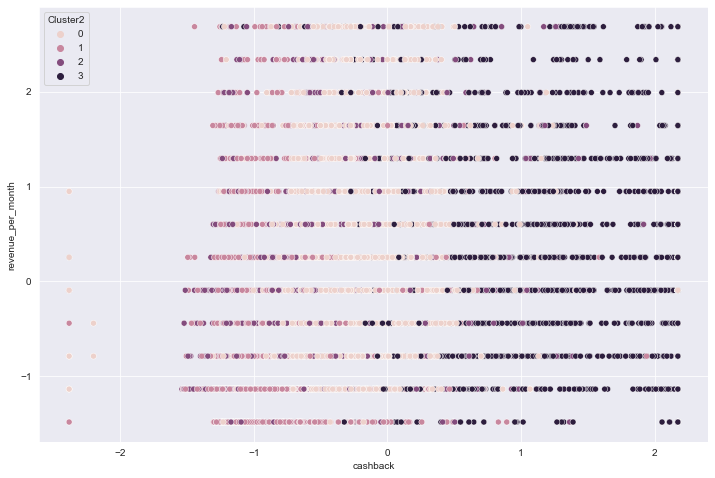

In [1184]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=scaled_df, y="revenue_per_month", x="cashback", hue="Cluster2")

# Project Notes 2

In [270]:
##  Function to calculate different metric scores of the model for train and test - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,Y_train)
    test_acc = model.score(X_test,Y_test)
    
    train_recall = metrics.recall_score(Y_train,pred_train)
    test_recall = metrics.recall_score(Y_test,pred_test)
    
    train_precision = metrics.precision_score(Y_train,pred_train)
    test_precision = metrics.precision_score(Y_test,pred_test)
    
    train_f1 = metrics.f1_score(Y_train,pred_train)
    test_f1 = metrics.f1_score(Y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",round(model.score(X_train,Y_train),3))
        print("Accuracy on test set : ",round(model.score(X_test,Y_test),3))
        print("Recall on training set : ",round(metrics.recall_score(Y_train,pred_train),3))
        print("Recall on test set : ",round(metrics.recall_score(Y_test,pred_test),3))
        print("Precision on training set : ",round(metrics.precision_score(Y_train,pred_train),3))
        print("Precision on test set : ",round(metrics.precision_score(Y_test,pred_test),3))
        print("F1 on training set : ",round(metrics.f1_score(Y_train,pred_train),3))
        print("F1 on test set : ",round(metrics.f1_score(Y_test,pred_test),3))
        
        print("\n Classification Report of Training Data")
        print(classification_report(Y_train, pred_train))
        
        print("\n Classification Report of Testing Data")
        print(classification_report(Y_test, pred_test))
        
        
    
    return score_list # returning the list with train and test scores
    

In [248]:
def get_metrics_diag(model):
    
    # predict probabilities
    probs = model.predict_proba(X_train)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    lr_train_auc = roc_auc_score(Y_train, probs)
    print('\nAUC & ROC Graph of Training Data\n')
    print('Area under the curve: %.3f' % lr_train_auc)
    # calculate roc curve
    lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(Y_train, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(lr_train_fpr, lr_train_tpr);
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.show()
    
    # Predict probabilities.
    probs= model.predict_proba(X_test)
    # Keep probabilities for the positive outcome only
    probs= probs[:,1]
    # Calculate AUC.
    lr_test_auc= roc_auc_score(Y_test,probs)
    print('\nAUC & ROC Graph of Testing Data\n')
    print('Area under the curve: %.3f' % lr_test_auc)
    # Calculate roc curve.
    lr_test_fpr, lr_test_tpr, lr_test_thresholds= roc_curve(Y_test,probs)
    plt.plot([0,1],[0,1],linestyle='--')
    # Plot the roc curve for the model.
    plt.plot(lr_test_fpr,lr_test_tpr);
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.show()
    
    sns.set(style="white")
    plot_confusion_matrix(model,X_train,Y_train);
    plt.title('Confusion Matrix for Training Data')
    plt.show()
    
    plot_confusion_matrix(model,X_test,Y_test);
    plt.title('Confusion Matrix for Testing Data')
    plt.show()

# Model 1 - Logistic Regression with Smote

In [271]:
lr_sm=LogisticRegression()
lr_sm.fit(X_train_res,Y_train_res)

LogisticRegression()

### Model Evaluation -  Accuracy,AUC,ROC,Confusion Matrix and Classification Report for the training data

In [272]:
#Using above defined function to get accuracy, recall and precision on train and test set
lr_sm_score = get_metrics_score(lr_sm)

Accuracy on training set :  0.78
Accuracy on test set :  0.776
Recall on training set :  0.823
Recall on test set :  0.817
Precision on training set :  0.421
Precision on test set :  0.416
F1 on training set :  0.557
F1 on test set :  0.552

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.85      6406
         1.0       0.42      0.82      0.56      1294

    accuracy                           0.78      7700
   macro avg       0.69      0.80      0.71      7700
weighted avg       0.87      0.78      0.80      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      2743
         1.0       0.42      0.82      0.55       558

    accuracy                           0.78      3301
   macro avg       0.69      0.79      0.70      3301
weighted avg       0.86      0.78      0.80      3301




AUC & ROC Graph of Training Data

Area under the curve: 0.867


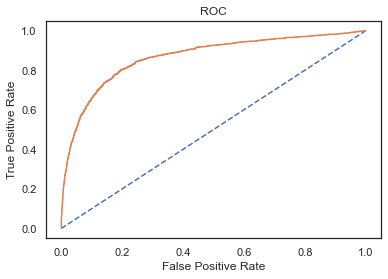


AUC & ROC Graph of Testing Data

Area under the curve: 0.850


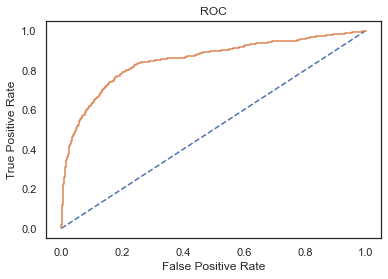

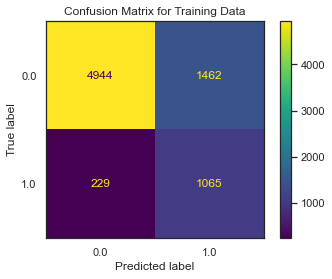

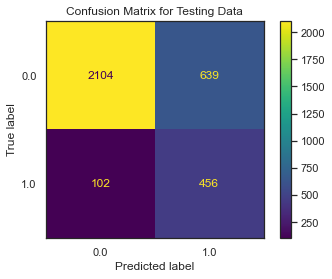

In [273]:
get_metrics_diag(lr_sm)

# Model 2 - Logistic Regression without Smote

In [274]:
# Fit the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation -  Accuracy,AUC,ROC,Confusion Matrix and Classification Report for the training & testing data

In [275]:
#Using above defined function to get accuracy, recall and precision on train and test set
lr_model_score = get_metrics_score(lr_model)

Accuracy on training set :  0.878
Accuracy on test set :  0.882
Recall on training set :  0.414
Recall on test set :  0.444
Precision on training set :  0.745
Precision on test set :  0.754
F1 on training set :  0.533
F1 on test set :  0.559

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6406
         1.0       0.75      0.41      0.53      1294

    accuracy                           0.88      7700
   macro avg       0.82      0.69      0.73      7700
weighted avg       0.87      0.88      0.86      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2743
         1.0       0.75      0.44      0.56       558

    accuracy                           0.88      3301
   macro avg       0.82      0.71      0.75      3301
weighted avg       0.87      0.88      0.87      3301



In [ ]:
# Without smote returned better results


AUC & ROC Graph of Training Data

Area under the curve: 0.867


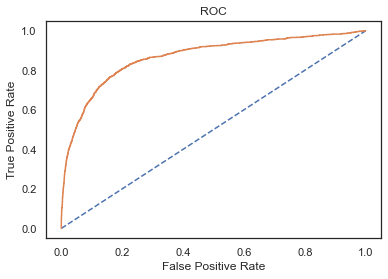


AUC & ROC Graph of Testing Data

Area under the curve: 0.851


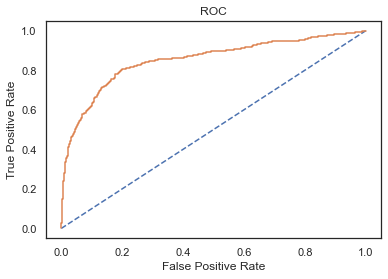

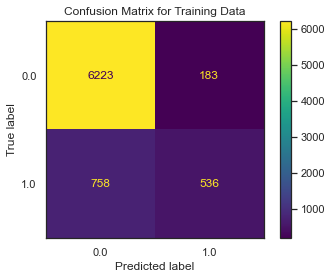

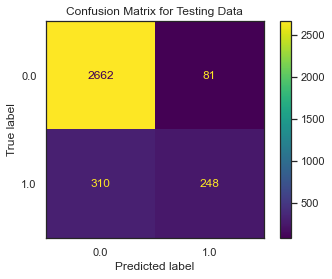

In [276]:
get_metrics_diag(lr_model)

# Model 3 Applying GridSearchCV for Logistic Regression

In [289]:
param_grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.001,0.01]}

In [290]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [291]:
grid_search_lr = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3,n_jobs=-1,scoring='f1')

In [292]:
grid_search_lr.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='f1')

In [293]:
print(grid_search_lr.best_params_,'\n')
print(grid_search_lr.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='none')


In [294]:
best_model_lr = grid_search_lr.best_estimator_

In [295]:
best_model_lr

LogisticRegression(max_iter=100000, n_jobs=2, penalty='none')

In [296]:
#Using above defined function to get accuracy, recall and precision on train and test set
best_model_lr_score=get_metrics_score(best_model_lr)

Accuracy on training set :  0.878
Accuracy on test set :  0.882
Recall on training set :  0.429
Recall on test set :  0.464
Precision on training set :  0.737
Precision on test set :  0.742
F1 on training set :  0.542
F1 on test set :  0.571

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6406
         1.0       0.74      0.43      0.54      1294

    accuracy                           0.88      7700
   macro avg       0.82      0.70      0.74      7700
weighted avg       0.87      0.88      0.86      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2743
         1.0       0.74      0.46      0.57       558

    accuracy                           0.88      3301
   macro avg       0.82      0.72      0.75      3301
weighted avg       0.87      0.88      0.87      3301




AUC & ROC Graph of Training Data

Area under the curve: 0.868


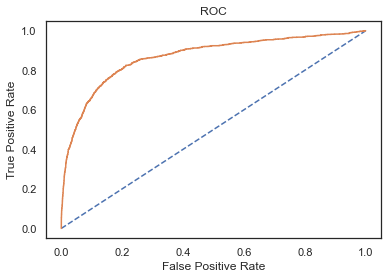


AUC & ROC Graph of Testing Data

Area under the curve: 0.852


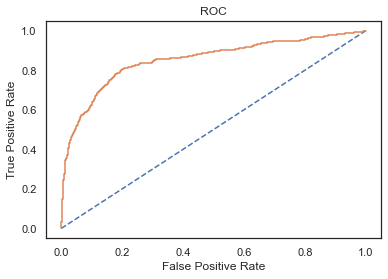

In [315]:
get_metrics_diag(best_model_lr)

# Model 4 - Linear Discriminant Analysis

In [286]:
#Build LDA Model
lda_model = LinearDiscriminantAnalysis()
lda_model=lda_model.fit(X_train,Y_train)

### Model Evaluation -  Accuracy,AUC,ROC,Confusion Matrix and Classification Report for the training & testing data

In [287]:
#Using above defined function to get accuracy, recall and precision on train and test set
lda_model_score = get_metrics_score(lda_model)

Accuracy on training set :  0.874
Accuracy on test set :  0.875
Recall on training set :  0.388
Recall on test set :  0.414
Precision on training set :  0.735
Precision on test set :  0.726
F1 on training set :  0.508
F1 on test set :  0.527

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6406
         1.0       0.73      0.39      0.51      1294

    accuracy                           0.87      7700
   macro avg       0.81      0.68      0.72      7700
weighted avg       0.86      0.87      0.86      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2743
         1.0       0.73      0.41      0.53       558

    accuracy                           0.87      3301
   macro avg       0.81      0.69      0.73      3301
weighted avg       0.86      0.87      0.86      3301




AUC & ROC Graph of Training Data

Area under the curve: 0.856


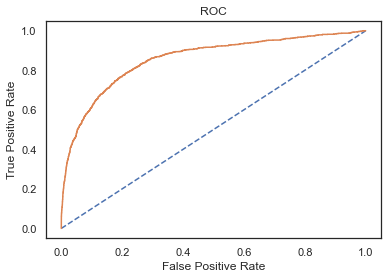


AUC & ROC Graph of Testing Data

Area under the curve: 0.843


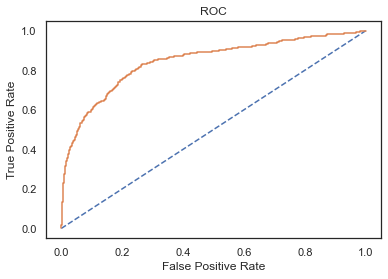

In [288]:
get_metrics_diag(lda_model)

# Model 5 - AdaBoost Classifier

In [419]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [420]:
AdaBoost = AdaBoostClassifier(random_state=1)
AdaBoost.fit(X_train,Y_train)

AdaBoostClassifier(random_state=1)

In [421]:
#Using above defined function to get accuracy, recall and precision on train and test set
AdaBoost_score=get_metrics_score(AdaBoost)

Accuracy on training set :  0.899
Accuracy on test set :  0.896
Recall on training set :  0.58
Recall on test set :  0.599
Precision on training set :  0.76
Precision on test set :  0.739
F1 on training set :  0.658
F1 on test set :  0.661

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      6406
         1.0       0.76      0.58      0.66      1294

    accuracy                           0.90      7700
   macro avg       0.84      0.77      0.80      7700
weighted avg       0.89      0.90      0.89      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2743
         1.0       0.74      0.60      0.66       558

    accuracy                           0.90      3301
   macro avg       0.83      0.78      0.80      3301
weighted avg       0.89      0.90      0.89      3301




AUC & ROC Graph of Training Data

Area under the curve: 0.917



AUC & ROC Graph of Testing Data

Area under the curve: 0.906


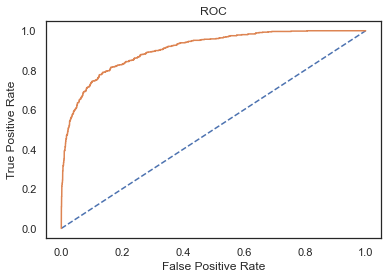

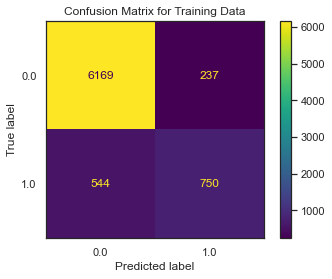

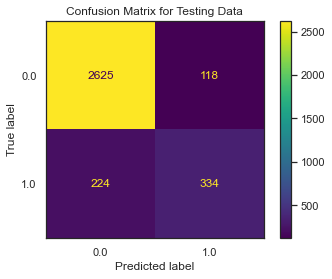

In [422]:
get_metrics_diag(AdaBoost)

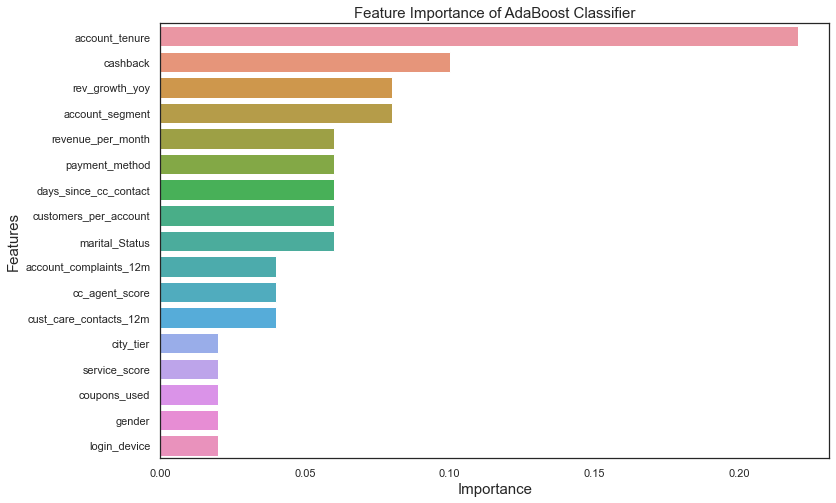

In [423]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': AdaBoost.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(12,8))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance of AdaBoost Classifier', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

# Model 6 - Gradient Boost Classifier

In [424]:
GradientBoost = GradientBoostingClassifier(random_state=1)
GradientBoost.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=1)

In [425]:
#Using above defined function to get accuracy, recall and precision on train and test set
GradientBoost_score=get_metrics_score(GradientBoost)

Accuracy on training set :  0.919
Accuracy on test set :  0.905
Recall on training set :  0.628
Recall on test set :  0.593
Precision on training set :  0.848
Precision on test set :  0.794
F1 on training set :  0.721
F1 on test set :  0.679

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      6406
         1.0       0.85      0.63      0.72      1294

    accuracy                           0.92      7700
   macro avg       0.89      0.80      0.84      7700
weighted avg       0.92      0.92      0.91      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      2743
         1.0       0.79      0.59      0.68       558

    accuracy                           0.91      3301
   macro avg       0.86      0.78      0.81      3301
weighted avg       0.90      0.91      0.90      3301




AUC & ROC Graph of Training Data

Area under the curve: 0.952


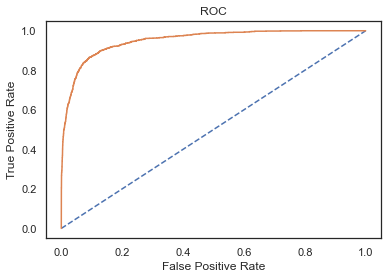


AUC & ROC Graph of Testing Data

Area under the curve: 0.934


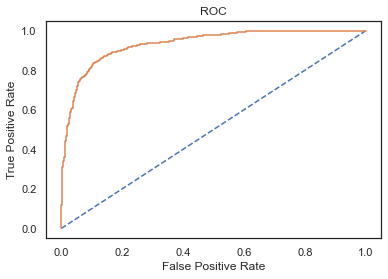

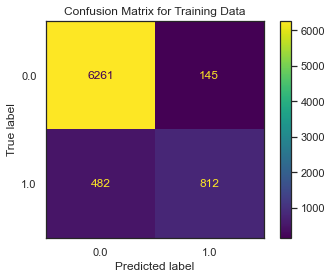

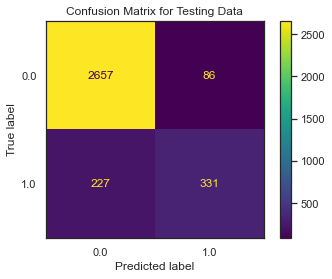

In [426]:
get_metrics_diag(GradientBoost)

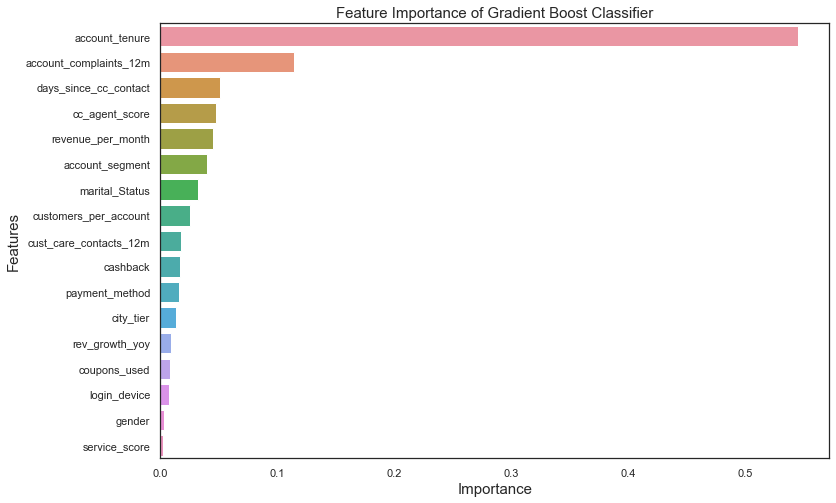

In [427]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': GradientBoost.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(12,8))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance of Gradient Boost Classifier', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

# Model 7 - XGBoost Classifier

In [428]:
from xgboost import XGBClassifier

In [429]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [430]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.962
Recall on training set :  0.999
Recall on test set :  0.864
Precision on training set :  1.0
Precision on test set :  0.906
F1 on training set :  1.0
F1 on test set :  0.884

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2743
         1.0       0.91      0.86      0.88       558

    accuracy                           0.96      3301
   macro avg       0.94      0.92      0.93      3301
weighted avg       0.96      0.96      0.96      3301




AUC & ROC Graph of Training Data

Area under the curve: 1.000


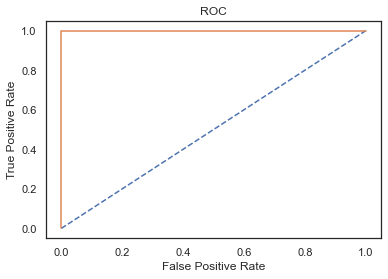


AUC & ROC Graph of Testing Data

Area under the curve: 0.988


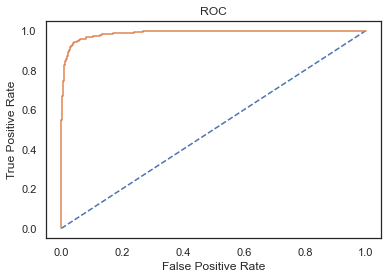

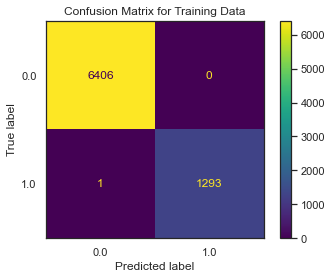

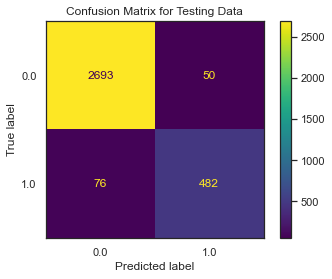

In [431]:
get_metrics_diag(xgb)

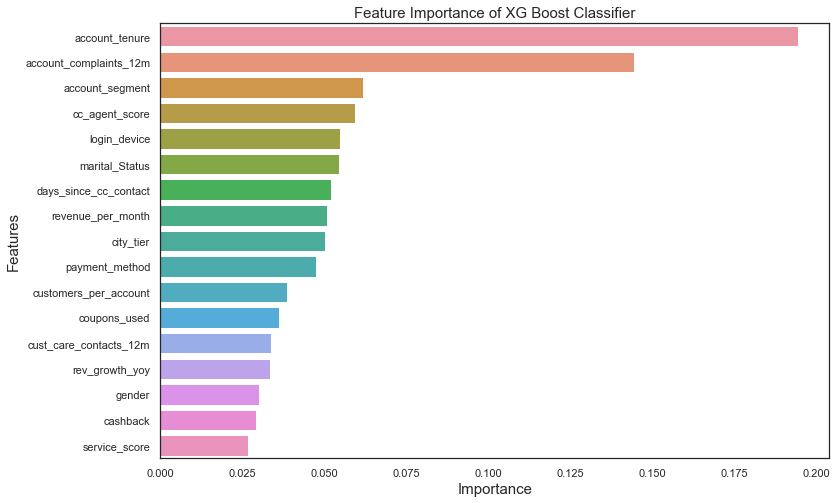

In [432]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(12,8))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance of XG Boost Classifier', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

# Model 8 - Hyperparameter Tuned XGBoost Classifier 

In [433]:
param_grid={'learning_rate':[0.1,0.05,0.2],
      'n_estimators':[1000,2000],
      'max_depth':[5,7,9]}

xgb = XGBClassifier(random_state=1)

In [434]:
grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3,n_jobs=-1,scoring='f1')

In [435]:
grid_search_xgb.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...t=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [5, 7, 9], 'n_estimators': [1000, 2000]},
             scoring='f1')

In [436]:
print(grid_search_xgb.best_params_,'\n')
print(grid_search_xgb.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000} 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)


In [437]:
best_model_xgb = grid_search_xgb.best_estimator_
best_model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [438]:
#Using above defined function to get accuracy, recall and precision on train and test set
best_model_xgb_score=get_metrics_score(best_model_xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.976
Recall on training set :  1.0
Recall on test set :  0.907
Precision on training set :  1.0
Precision on test set :  0.948
F1 on training set :  1.0
F1 on test set :  0.927

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2743
         1.0       0.95      0.91      0.93       558

    accuracy                           0.98      3301
   macro avg       0.96      0.95      0.96      3301
weighted avg       0.98      0.98      0.98      3301




AUC & ROC Graph of Training Data

Area under the curve: 1.000


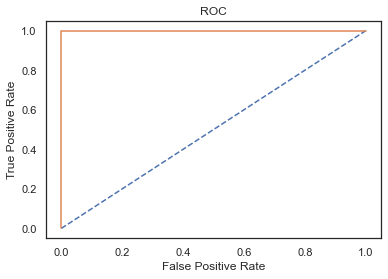


AUC & ROC Graph of Testing Data

Area under the curve: 0.993


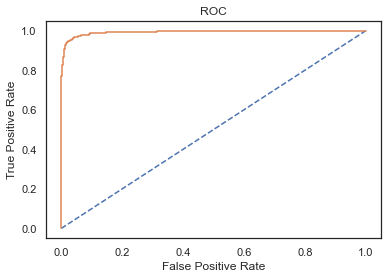

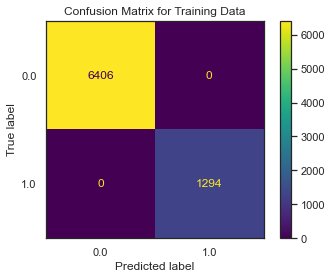

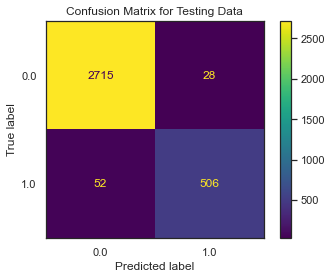

In [439]:
get_metrics_diag(best_model_xgb)

# Model 9 - Hyperparameter Tuned AdaBoost Classifier 

In [440]:
from sklearn.tree import DecisionTreeClassifier

In [441]:
AdaBoost_tuned = AdaBoostClassifier(random_state=1)

param_grid = {
    "base_estimator":[DecisionTreeClassifier(max_depth=10),DecisionTreeClassifier(max_depth=20),DecisionTreeClassifier(max_depth=30)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}


# Run the grid search
grid_search_ada = GridSearchCV(estimator = AdaBoost_tuned, param_grid = param_grid, cv = 3,n_jobs=-1,scoring='f1')
grid_search_ada.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=10),
                                            DecisionTreeClassifier(max_depth=20),
                                            DecisionTreeClassifier(max_depth=30)],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='f1')

In [442]:
print(grid_search_ada.best_params_,'\n')
print(grid_search_ada.best_estimator_)

{'base_estimator': DecisionTreeClassifier(max_depth=10), 'learning_rate': 1.2000000000000002, 'n_estimators': 100} 

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=1.2000000000000002, n_estimators=100,
                   random_state=1)


In [443]:
best_model_AdaBoost = grid_search_ada.best_estimator_
best_model_AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=1.2000000000000002, n_estimators=100,
                   random_state=1)

In [458]:
best_model_AdaBoost.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=1.2000000000000002, n_estimators=100,
                   random_state=1)

In [460]:
#Using above defined function to get accuracy, recall and precision on train and test set
best_model_AdaBoost_score=get_metrics_score(best_model_AdaBoost)

Accuracy on training set :  1.0
Accuracy on test set :  0.97
Recall on training set :  1.0
Recall on test set :  0.864
Precision on training set :  1.0
Precision on test set :  0.956
F1 on training set :  1.0
F1 on test set :  0.908

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2743
         1.0       0.96      0.86      0.91       558

    accuracy                           0.97      3301
   macro avg       0.96      0.93      0.95      3301
weighted avg       0.97      0.97      0.97      3301




AUC & ROC Graph of Training Data

Area under the curve: 1.000


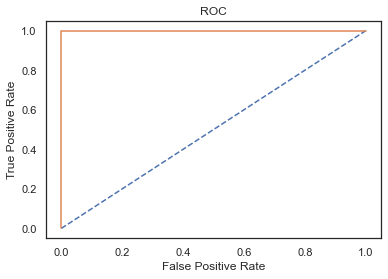


AUC & ROC Graph of Testing Data

Area under the curve: 0.993


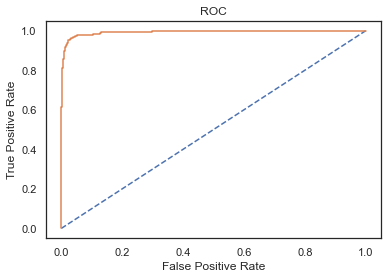

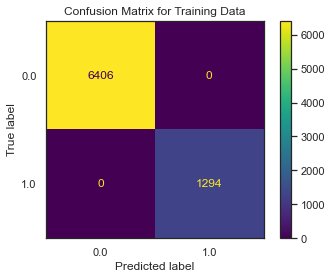

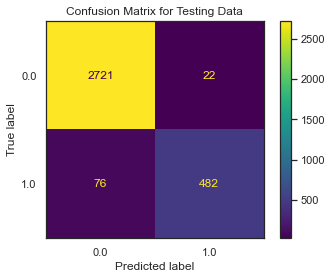

In [445]:
get_metrics_diag(best_model_AdaBoost)

# Model 10 - Hyperparameter Tuned Gradient Boosting Classifier

In [446]:
param_grid={
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [4,5,7],
    'n_estimators': [50, 100, 150],
    'max_features': [4,5,6],
    'min_samples_leaf': [12,15,17],
    'min_samples_split': [30,50,70]
}

GradientBoost = GradientBoostingClassifier(random_state=1)

In [447]:
grid_search_gb = GridSearchCV(estimator = GradientBoost, param_grid = param_grid, cv = 3,n_jobs=-1,scoring='f1')

In [448]:
grid_search_gb.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [4, 5, 7], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [12, 15, 17],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [449]:
print(grid_search_gb.best_params_,'\n')
print(grid_search_gb.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 12, 'min_samples_split': 30, 'n_estimators': 150} 

GradientBoostingClassifier(max_depth=7, max_features=4, min_samples_leaf=12,
                           min_samples_split=30, n_estimators=150,
                           random_state=1)


In [450]:
best_model_GradientBoost = grid_search_gb.best_estimator_
best_model_GradientBoost

GradientBoostingClassifier(max_depth=7, max_features=4, min_samples_leaf=12,
                           min_samples_split=30, n_estimators=150,
                           random_state=1)

In [461]:
best_model_GradientBoost.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=7, max_features=4, min_samples_leaf=12,
                           min_samples_split=30, n_estimators=150,
                           random_state=1)

In [451]:
#Using above defined function to get accuracy, recall and precision on train and test set
best_model_GradientBoost_score=get_metrics_score(best_model_GradientBoost)

Accuracy on training set :  0.999
Accuracy on test set :  0.962
Recall on training set :  0.995
Recall on test set :  0.833
Precision on training set :  1.0
Precision on test set :  0.934
F1 on training set :  0.997
F1 on test set :  0.881

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       1.00      0.99      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2743
         1.0       0.93      0.83      0.88       558

    accuracy                           0.96      3301
   macro avg       0.95      0.91      0.93      3301
weighted avg       0.96      0.96      0.96      3301




AUC & ROC Graph of Training Data

Area under the curve: 1.000


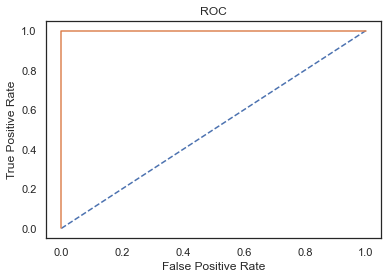


AUC & ROC Graph of Testing Data

Area under the curve: 0.990


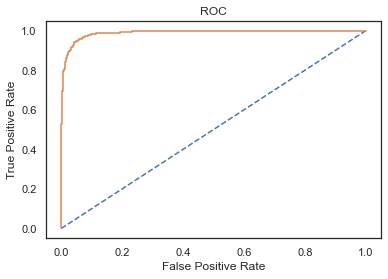

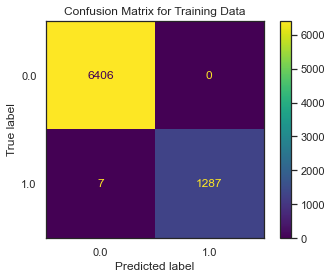

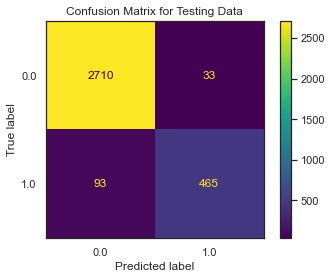

In [452]:
get_metrics_diag(best_model_GradientBoost)

# Model 11 - Random Forest

In [364]:
from sklearn.ensemble import RandomForestClassifier

In [365]:
rf =  RandomForestClassifier(random_state = 1)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [366]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_score=get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.963
Recall on training set :  1.0
Recall on test set :  0.817
Precision on training set :  1.0
Precision on test set :  0.958
F1 on training set :  1.0
F1 on test set :  0.882

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2743
         1.0       0.96      0.82      0.88       558

    accuracy                           0.96      3301
   macro avg       0.96      0.90      0.93      3301
weighted avg       0.96      0.96      0.96      3301




AUC & ROC Graph of Training Data

Area under the curve: 1.000


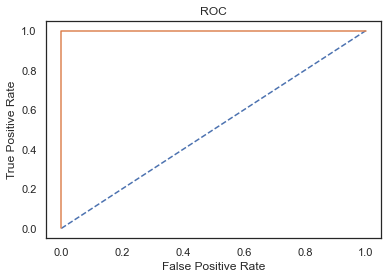


AUC & ROC Graph of Testing Data

Area under the curve: 0.990


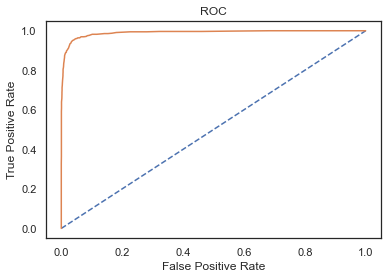

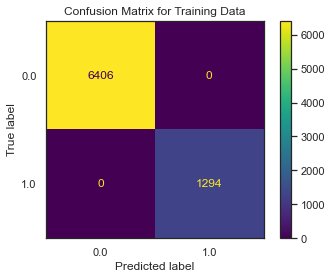

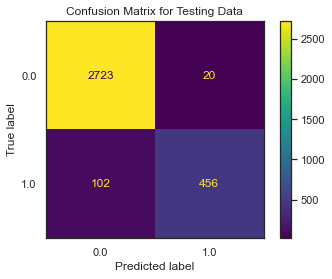

In [367]:
get_metrics_diag(rf)

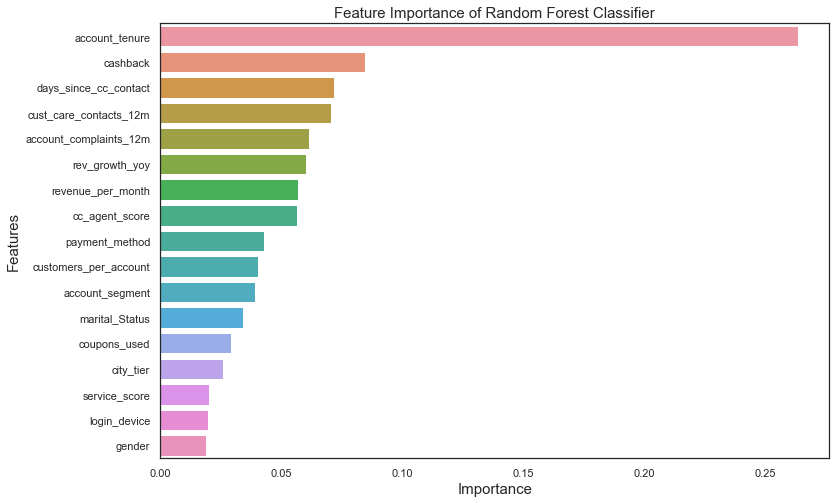

In [369]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(12,8))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance of Random Forest Classifier', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

# Model 12 - Random Forest Tuned

In [388]:
param_grid_rfcl = {
    'max_depth': [7,8,9],
    'max_features': ["sqrt", "log2"],
    'min_samples_leaf': [12,15,17],
    'min_samples_split': [30,50,70],
    'n_estimators': [100,200,300],
    'criterion': ['gini','entropy']
}

rfcl = RandomForestClassifier(random_state=1)
grid_search_rfcl= GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl,cv=5, scoring='f1', n_jobs=-1)

In [389]:
grid_search_rfcl.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [12, 15, 17],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [390]:
print(grid_search_rfcl.best_params_,'\n')
print(grid_search_rfcl.best_estimator_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 30, 'n_estimators': 200} 

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=12,
                       min_samples_split=30, n_estimators=200, random_state=1)


In [489]:
grid_search_rfcl.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=12,
                       min_samples_split=30, n_estimators=200, random_state=1)

In [391]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_tuned_score=get_metrics_score(grid_search_rfcl)

Accuracy on training set :  0.742
Accuracy on test set :  0.688
Recall on training set :  0.631
Recall on test set :  0.586
Precision on training set :  0.9
Precision on test set :  0.834
F1 on training set :  0.742
F1 on test set :  0.688

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      6406
         1.0       0.90      0.63      0.74      1294

    accuracy                           0.93      7700
   macro avg       0.91      0.81      0.85      7700
weighted avg       0.92      0.93      0.92      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      2743
         1.0       0.83      0.59      0.69       558

    accuracy                           0.91      3301
   macro avg       0.88      0.78      0.82      3301
weighted avg       0.91      0.91      0.90      3301




AUC & ROC Graph of Training Data

Area under the curve: 0.954


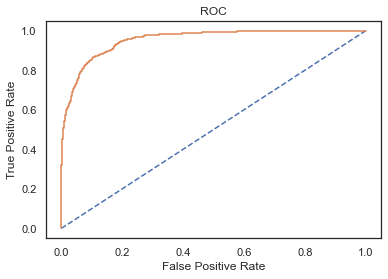


AUC & ROC Graph of Testing Data

Area under the curve: 0.935


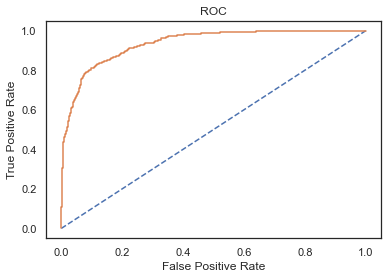

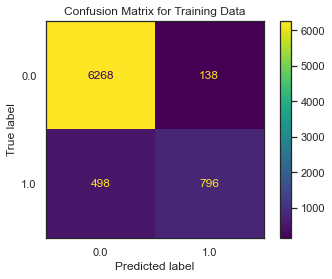

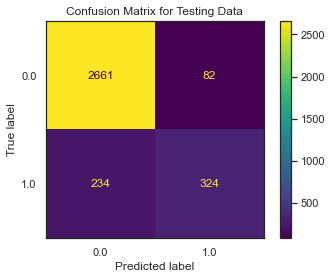

In [377]:
get_metrics_diag(grid_search_rfcl)

# Model 12 - ANN Model

In [396]:
from sklearn.neural_network import MLPClassifier

In [397]:
ANN = MLPClassifier()
ANN.fit(X_train, Y_train)

MLPClassifier()

In [398]:
#Using above defined function to get accuracy, recall and precision on train and test set
best_model_ANN_score=get_metrics_score(ANN)


Accuracy on training set :  0.941
Accuracy on test set :  0.92
Recall on training set :  0.787
Recall on test set :  0.738
Precision on training set :  0.852
Precision on test set :  0.779
F1 on training set :  0.818
F1 on test set :  0.758

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      6406
         1.0       0.85      0.79      0.82      1294

    accuracy                           0.94      7700
   macro avg       0.90      0.88      0.89      7700
weighted avg       0.94      0.94      0.94      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      2743
         1.0       0.78      0.74      0.76       558

    accuracy                           0.92      3301
   macro avg       0.86      0.85      0.86      3301
weighted avg       0.92      0.92      0.92      3301




AUC & ROC Graph of Training Data

Area under the curve: 0.968


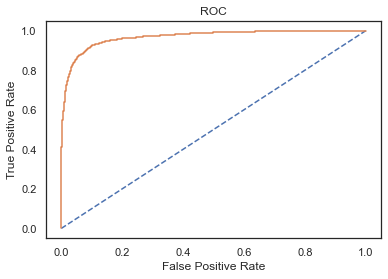


AUC & ROC Graph of Testing Data

Area under the curve: 0.947


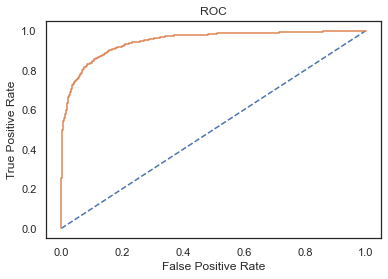

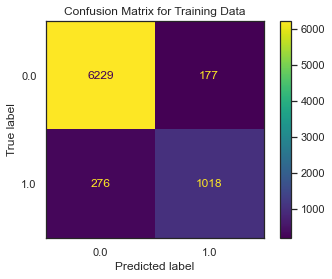

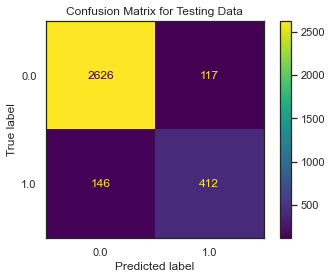

In [399]:
get_metrics_diag(ANN)

# Model 13 - ANN Model Tuned

In [402]:
param_grid_ann = {
    'hidden_layer_sizes': [100],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

ANN_tuned = MLPClassifier(max_iter=5000,verbose=True,  random_state=1)

In [403]:
grid_search_ann= GridSearchCV(estimator = ANN_tuned, param_grid = param_grid_ann,cv=5, scoring='f1', n_jobs=-1)
grid_search_ann.fit(X_train,Y_train)

Iteration 1, loss = 0.49850556
Iteration 2, loss = 0.42272667
Iteration 3, loss = 0.39133145
Iteration 4, loss = 0.36956434
Iteration 5, loss = 0.35404278
Iteration 6, loss = 0.34277879
Iteration 7, loss = 0.33538319
Iteration 8, loss = 0.32916108
Iteration 9, loss = 0.32518762
Iteration 10, loss = 0.32194730
Iteration 11, loss = 0.31966557
Iteration 12, loss = 0.31870501
Iteration 13, loss = 0.31568982
Iteration 14, loss = 0.31504929
Iteration 15, loss = 0.31418166
Iteration 16, loss = 0.31323762
Iteration 17, loss = 0.31304976
Iteration 18, loss = 0.31221646
Iteration 19, loss = 0.31141415
Iteration 20, loss = 0.31264441
Iteration 21, loss = 0.31188510
Iteration 22, loss = 0.31128000
Iteration 23, loss = 0.31283540
Iteration 24, loss = 0.31087457
Iteration 25, loss = 0.31086153
Iteration 26, loss = 0.31085503
Iteration 27, loss = 0.31033201
Iteration 28, loss = 0.31072321
Iteration 29, loss = 0.31017855
Iteration 30, loss = 0.31009596
Iteration 31, loss = 0.31019298
Iteration 32, los

Iteration 259, loss = 0.23673198
Iteration 260, loss = 0.23633691
Iteration 261, loss = 0.23758366
Iteration 262, loss = 0.23593573
Iteration 263, loss = 0.23532449
Iteration 264, loss = 0.23608662
Iteration 265, loss = 0.23594036
Iteration 266, loss = 0.23589453
Iteration 267, loss = 0.23449359
Iteration 268, loss = 0.23413010
Iteration 269, loss = 0.23376207
Iteration 270, loss = 0.23361089
Iteration 271, loss = 0.23574911
Iteration 272, loss = 0.23292796
Iteration 273, loss = 0.23301259
Iteration 274, loss = 0.23244383
Iteration 275, loss = 0.23248822
Iteration 276, loss = 0.23189761
Iteration 277, loss = 0.23202925
Iteration 278, loss = 0.23095310
Iteration 279, loss = 0.23125815
Iteration 280, loss = 0.23072251
Iteration 281, loss = 0.23078960
Iteration 282, loss = 0.23005827
Iteration 283, loss = 0.23093808
Iteration 284, loss = 0.22928815
Iteration 285, loss = 0.22931734
Iteration 286, loss = 0.22957819
Iteration 287, loss = 0.22874686
Iteration 288, loss = 0.22893156
Iteration 

Iteration 513, loss = 0.17488922
Iteration 514, loss = 0.17445063
Iteration 515, loss = 0.17305337
Iteration 516, loss = 0.17355953
Iteration 517, loss = 0.17476817
Iteration 518, loss = 0.17328264
Iteration 519, loss = 0.17298884
Iteration 520, loss = 0.17224402
Iteration 521, loss = 0.17257544
Iteration 522, loss = 0.17387323
Iteration 523, loss = 0.17202577
Iteration 524, loss = 0.17264782
Iteration 525, loss = 0.17126909
Iteration 526, loss = 0.17219775
Iteration 527, loss = 0.17072252
Iteration 528, loss = 0.17132149
Iteration 529, loss = 0.17216857
Iteration 530, loss = 0.17011630
Iteration 531, loss = 0.17071861
Iteration 532, loss = 0.17015218
Iteration 533, loss = 0.17003525
Iteration 534, loss = 0.17034788
Iteration 535, loss = 0.16927771
Iteration 536, loss = 0.17165126
Iteration 537, loss = 0.16845073
Iteration 538, loss = 0.16833072
Iteration 539, loss = 0.16826180
Iteration 540, loss = 0.16874257
Iteration 541, loss = 0.16877295
Iteration 542, loss = 0.16796274
Iteration 

Iteration 770, loss = 0.12422027
Iteration 771, loss = 0.12452163
Iteration 772, loss = 0.12462275
Iteration 773, loss = 0.12417309
Iteration 774, loss = 0.12333599
Iteration 775, loss = 0.12274295
Iteration 776, loss = 0.12265221
Iteration 777, loss = 0.12293883
Iteration 778, loss = 0.12318355
Iteration 779, loss = 0.12214778
Iteration 780, loss = 0.12217819
Iteration 781, loss = 0.12254766
Iteration 782, loss = 0.12196820
Iteration 783, loss = 0.12210973
Iteration 784, loss = 0.12084257
Iteration 785, loss = 0.12178963
Iteration 786, loss = 0.12064343
Iteration 787, loss = 0.12139708
Iteration 788, loss = 0.12131682
Iteration 789, loss = 0.12113512
Iteration 790, loss = 0.12184456
Iteration 791, loss = 0.11983618
Iteration 792, loss = 0.12016119
Iteration 793, loss = 0.11964664
Iteration 794, loss = 0.12023085
Iteration 795, loss = 0.11998104
Iteration 796, loss = 0.11934003
Iteration 797, loss = 0.11915908
Iteration 798, loss = 0.11896661
Iteration 799, loss = 0.11900217
Iteration 

Iteration 1020, loss = 0.08664664
Iteration 1021, loss = 0.08641551
Iteration 1022, loss = 0.08588261
Iteration 1023, loss = 0.08519583
Iteration 1024, loss = 0.08505995
Iteration 1025, loss = 0.08583043
Iteration 1026, loss = 0.08554523
Iteration 1027, loss = 0.08469498
Iteration 1028, loss = 0.08523510
Iteration 1029, loss = 0.08482055
Iteration 1030, loss = 0.08459460
Iteration 1031, loss = 0.08534514
Iteration 1032, loss = 0.08413758
Iteration 1033, loss = 0.08491276
Iteration 1034, loss = 0.08470076
Iteration 1035, loss = 0.08429797
Iteration 1036, loss = 0.08457602
Iteration 1037, loss = 0.08339950
Iteration 1038, loss = 0.08382567
Iteration 1039, loss = 0.08320966
Iteration 1040, loss = 0.08437416
Iteration 1041, loss = 0.08542996
Iteration 1042, loss = 0.08495306
Iteration 1043, loss = 0.08308652
Iteration 1044, loss = 0.08249644
Iteration 1045, loss = 0.08317302
Iteration 1046, loss = 0.08231582
Iteration 1047, loss = 0.08216499
Iteration 1048, loss = 0.08233471
Iteration 1049

Iteration 1268, loss = 0.05846214
Iteration 1269, loss = 0.05821821
Iteration 1270, loss = 0.05832750
Iteration 1271, loss = 0.05804092
Iteration 1272, loss = 0.05817465
Iteration 1273, loss = 0.05838020
Iteration 1274, loss = 0.05749252
Iteration 1275, loss = 0.05742308
Iteration 1276, loss = 0.05750392
Iteration 1277, loss = 0.05764777
Iteration 1278, loss = 0.05731141
Iteration 1279, loss = 0.06029414
Iteration 1280, loss = 0.05704835
Iteration 1281, loss = 0.05723100
Iteration 1282, loss = 0.05738707
Iteration 1283, loss = 0.05659964
Iteration 1284, loss = 0.05680597
Iteration 1285, loss = 0.05746708
Iteration 1286, loss = 0.05727528
Iteration 1287, loss = 0.05671624
Iteration 1288, loss = 0.05618393
Iteration 1289, loss = 0.05812810
Iteration 1290, loss = 0.05686182
Iteration 1291, loss = 0.05648490
Iteration 1292, loss = 0.05555282
Iteration 1293, loss = 0.05583954
Iteration 1294, loss = 0.05578971
Iteration 1295, loss = 0.05560228
Iteration 1296, loss = 0.05576844
Iteration 1297

GridSearchCV(cv=5,
             estimator=MLPClassifier(max_iter=5000, random_state=1,
                                     verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.001, 0.01], 'hidden_layer_sizes': [100],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='f1')

In [404]:
print(grid_search_ann.best_params_,'\n')
print(grid_search_ann.best_estimator_)

{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'solver': 'adam'} 

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=100,
              max_iter=5000, random_state=1, verbose=True)


In [491]:
grid_search_ann

GridSearchCV(cv=5,
             estimator=MLPClassifier(max_iter=5000, random_state=1,
                                     verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.001, 0.01], 'hidden_layer_sizes': [100],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='f1')

In [490]:
grid_search_ann.best_estimator_

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=100,
              max_iter=5000, random_state=1, verbose=True)

In [405]:
#Using above defined function to get accuracy, recall and precision on train and test set
ann_tuned_score=get_metrics_score(grid_search_ann)

Accuracy on training set :  0.983
Accuracy on test set :  0.878
Recall on training set :  0.981
Recall on test set :  0.887
Precision on training set :  0.984
Precision on test set :  0.868
F1 on training set :  0.983
F1 on test set :  0.878

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       0.98      0.98      0.98      1294

    accuracy                           0.99      7700
   macro avg       0.99      0.99      0.99      7700
weighted avg       0.99      0.99      0.99      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2743
         1.0       0.87      0.89      0.88       558

    accuracy                           0.96      3301
   macro avg       0.92      0.93      0.93      3301
weighted avg       0.96      0.96      0.96      3301




AUC & ROC Graph of Training Data

Area under the curve: 0.999


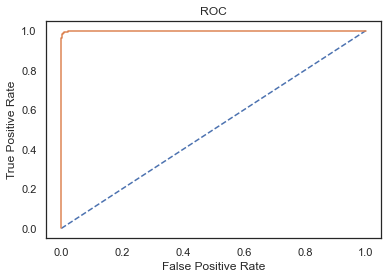


AUC & ROC Graph of Testing Data

Area under the curve: 0.979


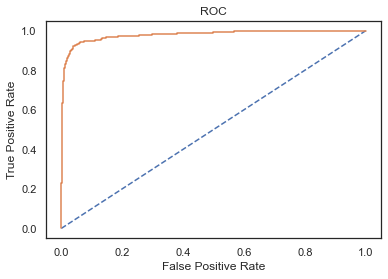

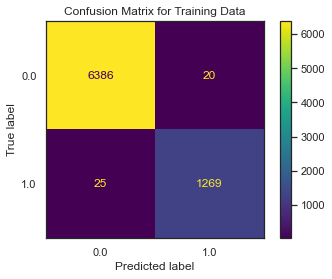

In [406]:
get_metrics_diag(grid_search_ann)

# Model 14 -KNN Model

In [407]:
from sklearn.neighbors import KNeighborsClassifier

In [408]:
KNN = KNeighborsClassifier()

In [409]:
# Fit the model on the training data
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [410]:
#Using above defined function to get accuracy, recall and precision on train and test set
KNN_score=get_metrics_score(KNN)

Accuracy on training set :  0.975
Accuracy on test set :  0.94
Recall on training set :  0.888
Recall on test set :  0.754
Precision on training set :  0.958
Precision on test set :  0.873
F1 on training set :  0.922
F1 on test set :  0.81

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      6406
         1.0       0.96      0.89      0.92      1294

    accuracy                           0.97      7700
   macro avg       0.97      0.94      0.95      7700
weighted avg       0.97      0.97      0.97      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      2743
         1.0       0.87      0.75      0.81       558

    accuracy                           0.94      3301
   macro avg       0.91      0.87      0.89      3301
weighted avg       0.94      0.94      0.94      3301




AUC & ROC Graph of Training Data

Area under the curve: 0.994



AUC & ROC Graph of Testing Data

Area under the curve: 0.966


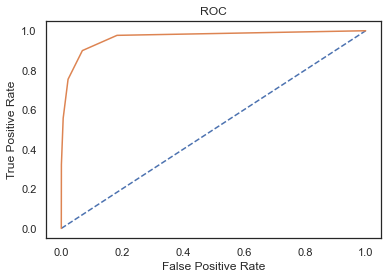

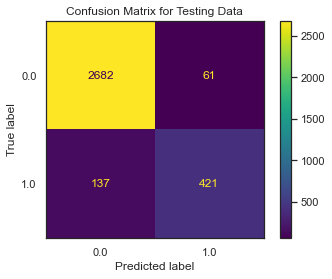

In [411]:
get_metrics_diag(KNN)

# Model 15 -KNN Model Tuned

In [413]:
KNN_gs = KNeighborsClassifier()
KNN_params ={'n_neighbors':[3,5,7,9,11]}
r2 = gridsearch(KNN_gs , KNN_params)
print(f'Best parameters for KNN: {r2}')

Best parameters for KNN: {'n_neighbors': 3}


In [414]:
KNN_tuned = KNeighborsClassifier(n_neighbors= 3)

In [415]:
# Fit the model on the training data
KNN_tuned .fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [416]:
#Using above defined function to get accuracy, recall and precision on train and test set
KNN_score=get_metrics_score(KNN_tuned)

Accuracy on training set :  0.986
Accuracy on test set :  0.957
Recall on training set :  0.941
Recall on test set :  0.849
Precision on training set :  0.974
Precision on test set :  0.891
F1 on training set :  0.958
F1 on test set :  0.87

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      6406
         1.0       0.97      0.94      0.96      1294

    accuracy                           0.99      7700
   macro avg       0.98      0.97      0.97      7700
weighted avg       0.99      0.99      0.99      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      2743
         1.0       0.89      0.85      0.87       558

    accuracy                           0.96      3301
   macro avg       0.93      0.91      0.92      3301
weighted avg       0.96      0.96      0.96      3301




AUC & ROC Graph of Training Data

Area under the curve: 0.998


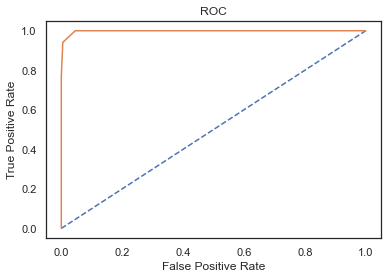


AUC & ROC Graph of Testing Data

Area under the curve: 0.969


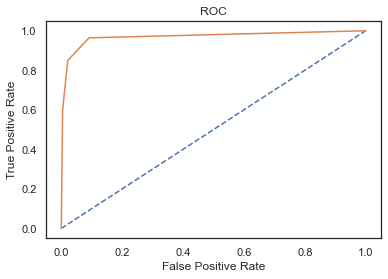

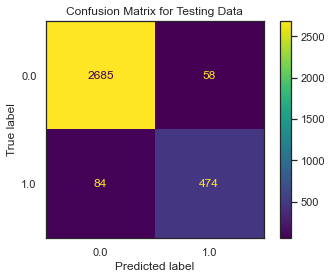

In [417]:
get_metrics_diag(KNN_tuned)

# Model 16 -Bagging with Decision Tree as base estimator

In [478]:
from sklearn.ensemble import BaggingClassifier

In [479]:
Bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,random_state=1)

In [480]:
Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [481]:
#Using above defined function to get accuracy, recall and precision on train and test set
Bagging_score=get_metrics_score(Bagging_model)

Accuracy on training set :  1.0
Accuracy on test set :  0.965
Recall on training set :  1.0
Recall on test set :  0.853
Precision on training set :  1.0
Precision on test set :  0.935
F1 on training set :  1.0
F1 on test set :  0.892

 Classification Report of Training Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6406
         1.0       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700


 Classification Report of Testing Data
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2743
         1.0       0.94      0.85      0.89       558

    accuracy                           0.97      3301
   macro avg       0.95      0.92      0.94      3301
weighted avg       0.96      0.97      0.96      3301




AUC & ROC Graph of Training Data

Area under the curve: 1.000


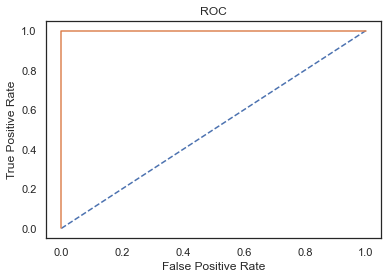


AUC & ROC Graph of Testing Data

Area under the curve: 0.986


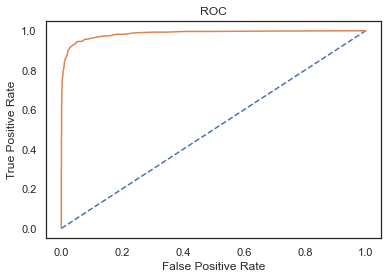

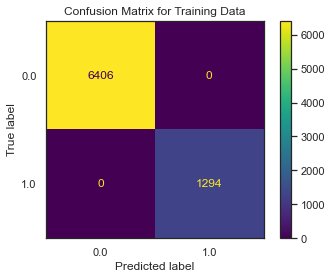

In [482]:
get_metrics_diag(Bagging_model)

# Comparing metrics of all models

In [500]:
# defining list of models
models = [lr_sm, lr_model, best_model_lr, lda_model, AdaBoost, best_model_AdaBoost, GradientBoost, best_model_GradientBoost, xgb, best_model_xgb, rf, grid_search_rfcl, ANN, grid_search_ann, KNN, KNN_tuned]
model_scores = [lr_sm_score, lr_model_score, best_model_lr_score, lda_model_score, AdaBoost_score, best_model_AdaBoost_score, GradientBoost_score, best_model_GradientBoost_score, xgb_score, best_model_xgb_score, rf_score, rf_tuned_score, best_model_ANN_score, ann_tuned_score, KNN_score, tuned_KNN_score, Bagging_score]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in model_scores:
    acc_train.append(np.round(model[0],2))
    acc_test.append(np.round(model[1],2))
    recall_train.append(np.round(model[2],2))
    recall_test.append(np.round(model[3],2))
    precision_train.append(np.round(model[4],2))
    precision_test.append(np.round(model[5],2))
    f1_train.append(np.round(model[6],2))
    f1_test.append(np.round(model[7],2))

In [501]:
model_names = ['Logistic Regression with Smote','Logistic Regression Without Smote','Logistic Regression-Tuned','LDA',
               'AdaBoost','AdaBoost-Tuned','Gradient Boost','Gradient Boosting-Tuned','XGBoost','XGBoost-Tuned',
               'Random Forest', 'Random Forest-Tuned','ANN','ANN-Tuned','KNN','KNN-Tuned', 'Bagging with Decision Tree']

metrics = pd.DataFrame({
    'Model':model_names, 
    'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
    'Train_Recall':recall_train,'Test_Recall':recall_test,
    'Train_Precision':precision_train,'Test_Precision':precision_test,
    'Train_f1':f1_train,'Test_f1':f1_test}) 

metrics

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_f1  Test_f1
0      Logistic Regression with Smote            0.78           0.78          0.82         0.82             0.42            0.42      0.56     0.55
1   Logistic Regression Without Smote            0.88           0.88          0.41         0.44             0.75            0.75      0.53     0.56
2           Logistic Regression-Tuned            0.88           0.88          0.43         0.46             0.74            0.74      0.54     0.57
3                                 LDA            0.87           0.87          0.39         0.41             0.73            0.73      0.51     0.53
4                            AdaBoost            0.90           0.90          0.58         0.60             0.76            0.74      0.66     0.66
5                      AdaBoost-Tuned            1.00           0.97          1.00         0.86             1.00            0.96      1.00     0.91
6                      Gradient Boost            0.92           0.91          0.63         0.59             0.85            0.79      0.72     0.68
7             Gradient Boosting-Tuned            1.00           0.96          0.99         0.83             1.00            0.93      1.00     0.88
8                             XGBoost            1.00           0.96          1.00         0.86             1.00            0.91      1.00     0.88
9                       XGBoost-Tuned            1.00           0.98          1.00         0.91             1.00            0.95      1.00     0.93
10                      Random Forest            1.00           0.96          1.00         0.82             1.00            0.96      1.00     0.88
11                Random Forest-Tuned            0.74           0.69          0.63         0.59             0.90            0.83      0.74     0.69
12                                ANN            0.94           0.92          0.79         0.74             0.85            0.78      0.82     0.76
13                          ANN-Tuned            0.98           0.88          0.98         0.89             0.98            0.87      0.98     0.88
14                                KNN            0.99           0.96          0.94         0.85             0.97            0.89      0.96     0.87
15                          KNN-Tuned            0.99           0.96          0.94         0.85             0.97            0.89      0.96     0.87
16         Bagging with Decision Tree            1.00           0.97          1.00         0.85             1.00            0.94      1.00     0.89

In [502]:
metrics.sort_values(by='Test_f1', ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_f1  Test_f1
9                       XGBoost-Tuned            1.00           0.98          1.00         0.91             1.00            0.95      1.00     0.93
5                      AdaBoost-Tuned            1.00           0.97          1.00         0.86             1.00            0.96      1.00     0.91
16         Bagging with Decision Tree            1.00           0.97          1.00         0.85             1.00            0.94      1.00     0.89
7             Gradient Boosting-Tuned            1.00           0.96          0.99         0.83             1.00            0.93      1.00     0.88
13                          ANN-Tuned            0.98           0.88          0.98         0.89             0.98            0.87      0.98     0.88
10                      Random Forest            1.00           0.96          1.00         0.82             1.00            0.96      1.00     0.88
8                             XGBoost            1.00           0.96          1.00         0.86             1.00            0.91      1.00     0.88
14                                KNN            0.99           0.96          0.94         0.85             0.97            0.89      0.96     0.87
15                          KNN-Tuned            0.99           0.96          0.94         0.85             0.97            0.89      0.96     0.87
12                                ANN            0.94           0.92          0.79         0.74             0.85            0.78      0.82     0.76
11                Random Forest-Tuned            0.74           0.69          0.63         0.59             0.90            0.83      0.74     0.69
6                      Gradient Boost            0.92           0.91          0.63         0.59             0.85            0.79      0.72     0.68
4                            AdaBoost            0.90           0.90          0.58         0.60             0.76            0.74      0.66     0.66
2           Logistic Regression-Tuned            0.88           0.88          0.43         0.46             0.74            0.74      0.54     0.57
1   Logistic Regression Without Smote            0.88           0.88          0.41         0.44             0.75            0.75      0.53     0.56
0      Logistic Regression with Smote            0.78           0.78          0.82         0.82             0.42            0.42      0.56     0.55
3                                 LDA            0.87           0.87          0.39         0.41             0.73            0.73      0.51     0.53

In [505]:
metrics.sort_values(by='Test_Recall', ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_f1  Test_f1
9                       XGBoost-Tuned            1.00           0.98          1.00         0.91             1.00            0.95      1.00     0.93
13                          ANN-Tuned            0.98           0.88          0.98         0.89             0.98            0.87      0.98     0.88
8                             XGBoost            1.00           0.96          1.00         0.86             1.00            0.91      1.00     0.88
5                      AdaBoost-Tuned            1.00           0.97          1.00         0.86             1.00            0.96      1.00     0.91
15                          KNN-Tuned            0.99           0.96          0.94         0.85             0.97            0.89      0.96     0.87
14                                KNN            0.99           0.96          0.94         0.85             0.97            0.89      0.96     0.87
16         Bagging with Decision Tree            1.00           0.97          1.00         0.85             1.00            0.94      1.00     0.89
7             Gradient Boosting-Tuned            1.00           0.96          0.99         0.83             1.00            0.93      1.00     0.88
10                      Random Forest            1.00           0.96          1.00         0.82             1.00            0.96      1.00     0.88
0      Logistic Regression with Smote            0.78           0.78          0.82         0.82             0.42            0.42      0.56     0.55
12                                ANN            0.94           0.92          0.79         0.74             0.85            0.78      0.82     0.76
4                            AdaBoost            0.90           0.90          0.58         0.60             0.76            0.74      0.66     0.66
6                      Gradient Boost            0.92           0.91          0.63         0.59             0.85            0.79      0.72     0.68
11                Random Forest-Tuned            0.74           0.69          0.63         0.59             0.90            0.83      0.74     0.69
2           Logistic Regression-Tuned            0.88           0.88          0.43         0.46             0.74            0.74      0.54     0.57
1   Logistic Regression Without Smote            0.88           0.88          0.41         0.44             0.75            0.75      0.53     0.56
3                                 LDA            0.87           0.87          0.39         0.41             0.73            0.73      0.51     0.53

In [506]:
metrics.sort_values(by='Test_Precision', ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_f1  Test_f1
5                      AdaBoost-Tuned            1.00           0.97          1.00         0.86             1.00            0.96      1.00     0.91
10                      Random Forest            1.00           0.96          1.00         0.82             1.00            0.96      1.00     0.88
9                       XGBoost-Tuned            1.00           0.98          1.00         0.91             1.00            0.95      1.00     0.93
16         Bagging with Decision Tree            1.00           0.97          1.00         0.85             1.00            0.94      1.00     0.89
7             Gradient Boosting-Tuned            1.00           0.96          0.99         0.83             1.00            0.93      1.00     0.88
8                             XGBoost            1.00           0.96          1.00         0.86             1.00            0.91      1.00     0.88
14                                KNN            0.99           0.96          0.94         0.85             0.97            0.89      0.96     0.87
15                          KNN-Tuned            0.99           0.96          0.94         0.85             0.97            0.89      0.96     0.87
13                          ANN-Tuned            0.98           0.88          0.98         0.89             0.98            0.87      0.98     0.88
11                Random Forest-Tuned            0.74           0.69          0.63         0.59             0.90            0.83      0.74     0.69
6                      Gradient Boost            0.92           0.91          0.63         0.59             0.85            0.79      0.72     0.68
12                                ANN            0.94           0.92          0.79         0.74             0.85            0.78      0.82     0.76
1   Logistic Regression Without Smote            0.88           0.88          0.41         0.44             0.75            0.75      0.53     0.56
4                            AdaBoost            0.90           0.90          0.58         0.60             0.76            0.74      0.66     0.66
2           Logistic Regression-Tuned            0.88           0.88          0.43         0.46             0.74            0.74      0.54     0.57
3                                 LDA            0.87           0.87          0.39         0.41             0.73            0.73      0.51     0.53
0      Logistic Regression with Smote            0.78           0.78          0.82         0.82             0.42            0.42      0.56     0.55